Run this cell if the computer hasn't installed the numpy, pandas, matplotlib and seaborn libraries yet

In [ ]:
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [296]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Selenium and Web Driver

Run this cell if the computer hasn't installed the selenium and webdriver-manager libraries yet

In [ ]:
# !pip install selenium
# !pip install webdriver-manager

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException
import time

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
driver.maximize_window()

# Scrape Data from Websites

## Lazada website

In [ ]:
df_Laz_product = pd.DataFrame(columns = ['Url', 'Name', 'Price', 'Sold'])
df_Laz_feedback = pd.DataFrame(columns = ['Product_Url', 'Content'])

Extract information from 120 products on Lazada website

In [ ]:
url = 'https://www.lazada.vn/#?'
driver.get(url)
search_box = driver.find_element(By.CSS_SELECTOR, "input.search-box__input--O34g")
search_box.send_keys("Quần áo nữ")
search_button = driver.find_element(By.CSS_SELECTOR, "a.search-box__button--1oH7")
search_button.click()

button_nextPage = driver.find_element(By.CSS_SELECTOR, 'li[title="Next Page"] button')

for i in range (0, 3):
    time.sleep(2)

    try:
        name_elements = driver.find_elements(By.CSS_SELECTOR, '.RfADt a')
        names = [e.text for e in name_elements]
        urls = [e.get_attribute('href') for e in name_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
        
    try:
        price_elements = driver.find_elements(By.CSS_SELECTOR, '.aBrP0')
        prices = [e.text for e in price_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
        
    try:
        sold_elements = driver.find_elements(By.CSS_SELECTOR, 'span._1cEkb')
        solds = [e.text for e in sold_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
    
    default_length = len(urls)
            
    if len(names) < default_length:
        names.extend(["0"] * (default_length - len(names)))
    if len(prices) < default_length:
        prices.extend(["0%"] * (default_length - len(prices)))
    if len(solds) < default_length:
        solds.extend(["0"] * (default_length - len(solds)))
    if len(nRates) < default_length:

    df = pd.DataFrame({
            'Url': urls,
            'Name': names,
            'Price': prices,
            'Sold': solds
        })

    df_Laz_product = pd.concat([df_Laz_product, df], ignore_index = True)
        
    button_nextPage.click()

In [ ]:
df_Laz_product

In [ ]:
product_urls = list(df_Laz_product['Url'])

In [ ]:
print(len(product_urls))
for url in product_urls:
    print(url)

Store the product URLs in a text file as a backup

In [ ]:
with open('Laz_product_urls.txt', mode='w') as file:
    for row in product_urls:
        file.write(row + "\n")

Retrieve the list of product URLs from the backup file

In [ ]:
with open('Laz_product_urls.txt', mode='r') as file:
    links = file.readlines()
links = [link.strip() for link in links]
# print(links)

Store the product dataframe in a csv file as a backup

In [ ]:
df_Laz_product.to_csv('lazada_products.csv', index=False)

Retrieve the product dataframe from the backup file

In [ ]:
df_Laz_product = pd.read_csv('lazada_products.csv')
df_Laz_product

Extract feedbacks from 120 products on Lazada website

In [ ]:
for url in Laz_product_urls:
    driver.get(url)
    time.sleep(5)
    
    driver.execute_script(f"window.scrollTo(0, 1550);")
    time.sleep(5)
    
    while True:
        try:
            content_elements = driver.find_elements(By.CSS_SELECTOR, '.item div:nth-child(3) .content')
            contents = [e.text for e in content_elements]
        except NoSuchElementException:
            print('NoSuchElementException')
            
        urls = [url for i in range(0, default_length)]
    
        df = pd.DataFrame({
                'Product_Url': urls,
                'Content': contents
            })
        df_Laz_feedback = pd.concat([df_Laz_feedback, df], ignore_index = True)
    
        driver.execute_script(f"window.scrollTo(0, 2280);")
        time.sleep(5)
        
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, 'button.next-btn.next-btn-normal.next-btn-medium.next-pagination-item.next')
        except NoSuchElementException:
            break
            print('NoSuchElementException')
        
        if next_button.get_attribute('disabled'):
            print("No more pages to scrape.")
            break
        else:
            next_button.click()
            time.sleep(5)

In [ ]:
df_Laz_feedback

Store the feedback dataframe in a csv file as a backup

In [ ]:
df_Laz_feedback.to_csv('lazada_feedbacks.csv', index=False)

Retrieve the feedback dataframe from the backup file

In [ ]:
df_Laz_feedback = pd.read_csv('lazada_feedbacks.csv')
df_Laz_feedback

In [ ]:
df_Shein_product = pd.DataFrame(columns = ['Url', 'Name', 'Price', 'Shop_url'])
df_Shein_shop = pd.DataFrame(columns = ['Url', 'Name', 'Followers'])

In [ ]:
#The url below is the original link to homepage of Shein website
#url = 'https://www.shein.com.vn/?_gl=1*1gloy8n*_up*MQ..&gclid=EAIaIQobChMIgbqoh-mDiAMV9tIWBR3KgQ6KEAAYASAAEgKgHPD_BwE'

#This url is the Shein website after send key 'QUần áo nữ' to the search input 
url = 'https://www.shein.com.vn/pdsearch/Qu%E1%BA%A7n%20%C3%A1o%20n%E1%BB%AF/?ici=s1`EditSearch`Qu%E1%BA%A7n%20%C3%A1o%20n%E1%BB%AF`_fb`d0`PageSearchResult&search_source=1&search_type=all&source=search&src_identifier=st%3D2%60sc%3DQu%E1%BA%A7n%20%C3%A1o%20n%E1%BB%AF%60sr%3D0%60ps%3D1&src_identifier_pre_search=&src_module=search&src_tab_page_id=page_search1724166755052'
driver.get(url)
time.sleep(5)

product_urls = []

dr_products = driver.find_elements(By.CSS_SELECTOR, 'div.product-card__goods-title-container a.goods-title-link')
print(len(dr_products))

for product in dr_products:
    url = product.get_attribute('href')
    product_urls.append(url)
    print(url)

product_urls = list(set(product_urls))

In [ ]:
with open('Shein_product_urls.txt', mode='w') as file:
    for row in product_urls:
        file.write(row + "\n")

In [ ]:
with open('Shein_product_urls.txt', mode='r') as file:
    links = file.readlines()
links = [link.strip() for link in links]
# print(links)

In [ ]:
Shein_product_urls = links

In [ ]:
Shein_shop_urls = []
for url in Shein_product_urls:
    driver.get(url)
    time.sleep(2)
        
    name = driver.find_element(By.CSS_SELECTOR, 'h1.product-intro__head-name').text
    print(name)

    if driver.find_element(By.CSS_SELECTOR, 'div.ProductIntroHeadPrice__head-mainprice .original span'):
        price = driver.find_element(By.CSS_SELECTOR, 'div.ProductIntroHeadPrice__head-mainprice .original span').text
    else:
        price = 0
    print(price)

    # shop_content_box = driver.find_element(By. CSS_SELECTOR, '.shop-entry__contentBox').get_attribute('style')
    # if driver.find_element(By. CSS_SELECTOR, '.shop-entry__contentBox').get_attribute('display') == 'display: none;':
    #     driver.find_element(By.CSS_SELECTOR, '.product-intro__brand-head').click()
    #     time.sleep(2)
    #     shop_url = driver.find_element(By.CSS_SELECTOR, 'div.seller-link a').get_attribute('href')
    #     Shein_shop_urls.append(shop_url)
    # else:
    #     shop_url = ''
    # print(shop_url)t

drive.quit()

In [ ]:
# /html/body/div[1]/div[1]/div/div[1]/div/div[2]/div[2]/div/div[5]/div[3]/div[1]/span

In [ ]:


# URL of the product page
url = "https://www.shein.com.vn/SHEIN-ICON-Women-s-Summer-Leopard-Print-Slim-Fit-Cropped-Camisole-Fashion-Cami-Top-p-36628205.html?src_identifier=st%3D2%60sc%3DQu%E1%BA%A7n%20%C3%A1o%20n%E1%BB%AF%60sr%3D0%60ps%3D1"

# Navigate to the URL
driver.get(url)
time.sleep(2)  # Wait for the page to load

try:
    # Get the product name
    product_name = driver.find_element(By.CSS_SELECTOR, 'h1.product-intro__head-name').text
    print(f"Product Name: {product_name}")
    
    # Get the price
    price = driver.find_element(By.CSS_SELECTOR, 'div.ProductIntroHeadPrice__head-mainprice .original span').text
    print(f"Price: {price}")
    
    # Get the shop name (if available)
    try:
        shop_name = driver.find_element(By.CSS_SELECTOR, 'a.store-name').text
        print(f"Shop Name: {shop_name}")
    except NoSuchElementException:
        shop_name = "N/A"
        print("Shop Name not found")
    
    # Get the number of followers (if available)
    try:
        followers = driver.find_element(By.CSS_SELECTOR, 'span.follow-number').text
        print(f"Followers: {followers}")
    except NoSuchElementException:
        followers = "N/A"
        print("Followers not found")

except NoSuchElementException as e:
    print(f"An error occurred: {e}")


## Tiki website

In [ ]:
df_Tiki_product = pd.DataFrame(columns = ['Url', 'Name', 'Price', 'Sold'])
df_Tiki_feedback = pd.DataFrame(columns = ['Product_Url', 'Content'])

Extract information from 120 products on Tiki website

In [ ]:
#The url below is the original link to homepage of Tiki website
#url = 'https://tiki.vn/'

#This url is the Tiki website after send key 'QUần áo nữ' to the search input 
url_sample = 'https://tiki.vn/search?q=Qu%E1%BA%A7n%20%C3%A1o%20n%E1%BB%AF{0}'
# driver.get(url)
time.sleep(5)

button_nextPage = driver.find_element(By.CSS_SELECTOR, 'a[data-view-id="product_list_pagination_item"]')

for i in range (1, 3):
    url = url_sample.format('&page=' + str(i))
    driver.get(url)
    time.sleep(2)

    try:
        url_elements = driver.find_elements(By.CSS_SELECTOR, 'a[data-view-id="product_list_item"]')
        urls = [e.get_attribute('href') for e in url_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
        
    try:
        name_elements = driver.find_elements(By.CSS_SELECTOR, 'h3.style__NameStyled-sc-139nb47-8')
        names = [e.text for e in name_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
        
    try:
        price_elements = driver.find_elements(By.CSS_SELECTOR, '.price-discount__price')
        prices = [e.text for e in price_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
        
    try:
        sold_elements = driver.find_elements(By.CSS_SELECTOR, 'span.quantity')
        solds = [e.text for e in sold_elements]
    except NoSuchElementException:
        print('NoSuchElementException')
    
    default_length = len(urls)
            
    if len(names) < default_length:
        names.extend(["0"] * (default_length - len(names)))
    if len(prices) < default_length:
        prices.extend(["0%"] * (default_length - len(prices)))
    if len(solds) < default_length:
        solds.extend(["0"] * (default_length - len(solds)))

    df = pd.DataFrame({
            'Url': urls,
            'Name': names,
            'Price': prices,
            'Sold': solds
        })

    df_Tiki_product = pd.concat([df_Tiki_product, df], ignore_index = True)

In [ ]:
product_urls = list(df_Tiki_product['Url'])

In [ ]:
df_Tiki_product

Store the product URLs in a text file as a backup

In [ ]:
with open('Tiki_product_urls.txt', mode='w') as file:
    for row in product_urls:
        file.write(row + "\n")

Retrieve the list of product URLs from the backup file

In [ ]:
with open('Tiki_product_urls.txt', mode='r') as file:
    links = file.readlines()
links = [link.strip() for link in links]
# print(links)

In [ ]:
Tiki_product_urls = links

Store the product dataframe in a csv file as a backup

In [ ]:
df_Tiki_product.to_csv('tiki_products.csv', index=False)

Retrieve the product dataframe from the backup file

In [ ]:
df_Tiki_product = pd.read_csv('tiki_products.csv')
df_Tiki_product

In [ ]:
for url in Tiki_product_urls:
    driver.get(url)
    time.sleep(5)
    
    driver.execute_script(f"window.scrollTo(0, 1550);")
    time.sleep(5)
    
    while True:
        try:
            content_elements = driver.find_elements(By.CSS_SELECTOR, '.review-comment__content')
            contents = [e.text for e in content_elements]
        except NoSuchElementException:
            print('NoSuchElementException')
            
        urls = [url for i in range(0, len(contents))]
    
        df = pd.DataFrame({
                'Product_Url': urls,
                'Content': contents
            })
        df_Tiki_feedback = pd.concat([df_Tiki_feedback, df], ignore_index = True)
    
        driver.execute_script(f"window.scrollTo(0, 2280);")
        time.sleep(5)
        
        try:
            next_button = driver.find_element(By.CSS_SELECTOR, 'a.next')
        except NoSuchElementException:
            break
            print('NoSuchElementException')
        
        if next_button.get_attribute('color') == "#C4C4CF":
            print("No more pages to scrape.")
            break
        else:
            next_button.click()
            time.sleep(5)

In [ ]:
df_Tiki_feedback

Store the feedback dataframe in a csv file as a backup

In [ ]:
df_Tiki_feedback.to_csv('tiki_feedbacks.csv', index=False)

Retrieve the feedback dataframe from the backup file

In [ ]:
df_Tiki_feedback = pd.read_csv('tiki_feedbacks.csv')
df_Tiki_feedback

In [ ]:
driver.quit()

# Pre-proccesing data

## Lazada

### df_Laz_product

In [297]:
df_Laz_product = pd.read_csv('lazada_products.csv')

In [298]:
df_Laz_product

,Url,Name,Price,Sold
0,https://www.lazada.vn/products/do-bo-nu-di-cho...,Đồ Bộ Nữ Đi Chơi Chất Thun Mát Size M - dưới 5...,"₫39,000",3.9K sold
1,https://www.lazada.vn/products/set-ao-phong-ta...,Sét áo phông tay lỡ phối kẻ + quần kẻ dài mẫu mới,"₫49,000",23 sold
2,https://www.lazada.vn/products/bo-pijama-do-bo...,"Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc xinh xắn","₫19,000",458 sold
3,https://www.lazada.vn/products/re-vo-dich-tong...,[ Rẻ Vô Địch ] Tổng hợp các sét quần hoạt hình...,"₫79,200",265 sold
4,https://www.lazada.vn/products/set-bo-ao-phong...,Set Bộ áo phông BđBcR Nữ Cotton Mix Quần dài K...,"₫49,000",171 sold
...,...,...,...,...
115,https://www.lazada.vn/products/set-quan-short-...,Set quần short đen + áo len sọc xanh QC,"₫52,000",18 sold
116,https://www.lazada.vn/products/ph-set-bo-3-ao-...,(PH) Set Bộ 3 Áo Ống Kèm Áo Lưới Tay Dài Croto...,"₫105,000",7 sold
117,https://www.lazada.vn/products/quan-dui-nu-mac...,"Quần đùi nữ mặc nhà ỐNG RỘNG, VẢI XƯỢC, DÂY KÉ...","₫35,800",15 sold
118,https://www.lazada.vn/products/do-bo-dui-co-tr...,Đồ Bộ Đùi Cổ Tròn Tay Cộc Chất Thun Cotton Su ...,"₫79,000",0


In [299]:
df_Laz_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Url     120 non-null    object
 1   Name    120 non-null    object
 2   Price   120 non-null    object
 3   Sold    120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


Convert column `['Price']` to float

In [300]:
df_Laz_product['Price'] = df_Laz_product['Price'].str.replace(',', '').str.replace('₫', '').astype(float)
df_Laz_product['Price']

0       39000.0
1       49000.0
2       19000.0
3       79200.0
4       49000.0
         ...   
115     52000.0
116    105000.0
117     35800.0
118     79000.0
119     98000.0
Name: Price, Length: 120, dtype: float64

Convert `['Sold']` to int

In [301]:
def convert_sold_to_int(sold_value):
    if 'K' in sold_value:
        return int(float(sold_value.replace('K', '')) * 1000)
    return int(sold_value)

In [302]:
df_Laz_product['Sold'] = df_Laz_product['Sold'].str.replace(' sold', '')
df_Laz_product['Sold'] = df_Laz_product['Sold'].apply(convert_sold_to_int)
df_Laz_product['Sold']

0      3900
1        23
2       458
3       265
4       171
       ... 
115      18
116       7
117      15
118       0
119       0
Name: Sold, Length: 120, dtype: int64

Run this cell if the computer hasn't installed the nltk library yet

In [303]:
# !pip install nltk

In [304]:
categories_keywords = {
    "đồ bộ": ["đồ bộ", "set", "bộ", "quần áo", "sét"],
    "đồ lót": ["đồ lót", "underwear", "quần lót", "áo lót", "áo ngực", "bra", "panty", "boxer", "quần chíp"],
    "váy/quần": ["váy", "quần", "skirt", "pants", "jeans"],
    "áo": ["áo", "t-shirt", "shirt", "croptop", "yếm", "khoác", "áo khoác", "vest", "blazer"],
    "đầm": ["đầm", "dress", "váy ngủ"], 
    "nón": ["nón", "mũ", "hat", "helmet"],
    "vớ": ["vớ", "tất", "socks"],
    "giày/dép": ["giày", "dép", "bata", "cao gót", "shoes", "slipper", "guốc", "boots", "xăng đan", "sandals", "sneakers"],
    "trang sức": ["trang sức", "nhẫn", "vòng", "dây chuyền", "earrings", "necklace"]
}

In [305]:
for c, k in categories_keywords.items():
    print('{0}: {1}'.format(c, k))

đồ bộ: ['đồ bộ', 'set', 'bộ', 'quần áo', 'sét']
đồ lót: ['đồ lót', 'underwear', 'quần lót', 'áo lót', 'áo ngực', 'bra', 'panty', 'boxer', 'quần chíp']
váy/quần: ['váy', 'quần', 'skirt', 'pants', 'jeans']
áo: ['áo', 't-shirt', 'shirt', 'croptop', 'yếm', 'khoác', 'áo khoác', 'vest', 'blazer']
đầm: ['đầm', 'dress', 'váy ngủ']
nón: ['nón', 'mũ', 'hat', 'helmet']
vớ: ['vớ', 'tất', 'socks']
giày/dép: ['giày', 'dép', 'bata', 'cao gót', 'shoes', 'slipper', 'guốc', 'boots', 'xăng đan', 'sandals', 'sneakers']
trang sức: ['trang sức', 'nhẫn', 'vòng', 'dây chuyền', 'earrings', 'necklace']


Classify products using n-grams techniques

In [306]:
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def generate_ngrams(string, n):
    string = unicodedata.normalize('NFC', string)
    tokens = word_tokenize(string, language='english')
    tokens = [token.lower() for token in tokens]
    return [' '.join(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]
    
def classify_product(name, categories_keywords):
    _2grams = generate_ngrams(name, 2)
    _1grams = generate_ngrams(name, 1)
    
    for category, keywords in categories_keywords.items():
        for keyword in keywords:
            if keyword in _2grams + _1grams: 
                return category 
    
    return "khác"

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Add a column `['Category']` to the `df_Laz_product` DataFrame using the `classify_product` function provided above

In [307]:
df_Laz_product['Category'] = df_Laz_product['Name'].apply(lambda name: classify_product(name, categories_keywords))

Re-check the new column

In [308]:
Laz_category_counts = df_Laz_product['Category'].value_counts()
print(Laz_category_counts)

Category
đồ bộ       104
khác          6
váy/quần      4
áo            3
đồ lót        2
đầm           1
Name: count, dtype: int64


Identify the outliers and manually replace them with the correct values

In [309]:
df_Laz_product[df_Laz_product['Category'] == 'khác']

,Url,Name,Price,Sold,Category
17,https://www.lazada.vn/products/gia-re-pijama-m...,"[Giá rẻ] pijama mặc nhà cho nữ giá sốc , hàng ...",35000.0,78,khác
38,https://www.lazada.vn/products/bo-do-ngu-nam-n...,Winter Adults Animal Dinosaur Onesies Women Me...,90000.0,0,khác
39,https://www.lazada.vn/products/kieu-co-dien-ch...,ZANZEA Women Vintage Casual Sleeveless Top Ela...,243200.0,0,khác
66,https://www.lazada.vn/products/thoi-trang-nu-m...,Casual Slim Playsuit Solid Color Sleeveless Se...,80623.0,28,khác
111,https://www.lazada.vn/products/bo-do-ngu-mua-x...,CHU MAN JIA Tracksuit Spring and autumn pajama...,86000.0,80,khác
119,https://www.lazada.vn/products/quan-ao-phu-nu-...,Pajama Women's Summer Loose Nightgown Women Ko...,98000.0,0,khác


In [310]:
df_Laz_product.loc[119, 'Url']

'https://www.lazada.vn/products/quan-ao-phu-nu-mang-thai-tuoi-teen-pajama-phu-nu-mua-he-ao-ngu-suong-cho-nu-phien-ban-han-quoc-kieu-hoc-sinh-de-thuong-co-lon-i2773757003.html'

In [311]:
df_Laz_product.loc[17, 'Category'] = 'đồ bộ'
df_Laz_product.loc[38, 'Category'] = 'đồ bộ'
df_Laz_product.loc[39, 'Category'] = 'áo'
df_Laz_product.loc[66, 'Category'] = 'đồ bộ'
df_Laz_product.loc[111, 'Category'] = 'đồ bộ'
df_Laz_product.loc[119, 'Category'] = 'đồ bộ'

Check if the dataframe has NaN value

In [312]:
Laz_nan_summary = df_Laz_product.isna().sum()
print(Laz_nan_summary)

Url         0
Name        0
Price       0
Sold        0
Category    0
dtype: int64


Check if the dataframe has duplicated value

In [313]:
print(len(df_Laz_product[df_Laz_product.duplicated()]))

0


### df_Laz_feedback

Overview the feedback dataframe

In [314]:
df_Laz_feedback = pd.read_csv('lazada_feedbacks.csv')

In [315]:
df_Laz_feedback

,Product_Url,Content
0,https://www.lazada.vn/products/do-bo-nu-di-cho...,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...
1,https://www.lazada.vn/products/do-bo-nu-di-cho...,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...
2,https://www.lazada.vn/products/do-bo-nu-di-cho...,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...
3,https://www.lazada.vn/products/do-bo-nu-di-cho...,"Vừa vặn và tôn dáng, Thiết kế thời trang cho v..."
4,https://www.lazada.vn/products/do-bo-nu-di-cho...,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...
...,...,...
9782,https://www.lazada.vn/products/quan-dui-nu-mac...,"quần tạm đc, đặt màu đen giao màu trắng."
9783,https://www.lazada.vn/products/quan-dui-nu-mac...,"quần tạm đc, giao đúng màu."
9784,https://www.lazada.vn/products/quan-dui-nu-mac...,"cái quần không có nút sao xài , làm ăn gian dố..."
9785,https://www.lazada.vn/products/do-bo-dui-co-tr...,"ba con coi ne,mua mâu nay giao mâu khac gi ma ..."


In [316]:
df_Laz_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9787 entries, 0 to 9786
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_Url  9787 non-null   object
 1   Content      9787 non-null   object
dtypes: object(2)
memory usage: 153.1+ KB


Check if the dataframe has NaN value

In [317]:
print(df_Laz_feedback.isna().sum())

Product_Url    0
Content        0
dtype: int64


Delete all the record containing NaN value

In [318]:
df_Laz_feedback = df_Laz_feedback.dropna(subset=['Content'])

Check if the dataframe has duplicated value

In [319]:
print(len(df_Laz_feedback[df_Laz_feedback.duplicated()]))

888


Delete all the record containing duplicated value

In [320]:
df_Laz_feedback = df_Laz_feedback.drop_duplicates()

## Tiki

### df_Tiki_product

In [321]:
df_Tiki_product = pd.read_csv('tiki_products.csv')

In [322]:
df_Tiki_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Url     120 non-null    object
 1   Name    120 non-null    object
 2   Price   120 non-null    object
 3   Sold    120 non-null    object
dtypes: object(4)
memory usage: 3.9+ KB


In [323]:
df_Tiki_product

,Url,Name,Price,Sold
0,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,Áo thun nam cổ tim ngắn tay đẹp nhiều màu đủ s...,84.000₫,Đã bán 366
1,https://tka.tiki.vn/pixel/pixel?data=JBCsdBl0H...,Áo thun Nữ croptop cổ tròn tay ngắn 7 màu cott...,84.000₫,Đã bán 32
2,https://tka.tiki.vn/pixel/pixel?data=YFssw43Od...,"Áo Thun Nam Ngắn Tay 5S FASHION, Chất Cotton M...",139.000₫,Đã bán 33
3,https://tka.tiki.vn/pixel/pixel?data=DaI5kfWdj...,"Xách ba lô lên và đi, mã TV4. Hãy tỏa sáng như...",62.000₫,Đã bán 46
4,https://tiki.vn/set-do-bo-nu-quan-caro-phoi-ao...,Sét đồ bộ nữ quần caro phối áo cổ tim thun cot...,89.100₫,Đã bán 47
...,...,...,...,...
115,https://tiki.vn/set-ao-tam-lanh-kem-quan-lenni...,SÉT ÁO TĂM LẠNH KÈM QUẦN LENNIN 5 MÀU Y HÌNH,155.000₫,0
116,https://tiki.vn/set-the-thao-nu-p54006376.html...,Set Thể Thao Nữ,310.000₫,0
117,https://tiki.vn/set-quan-short-ao-phong-maybe-...,Set Quần Short + Áo Phông Maybe June 1993 Ullz...,98.000₫,0
118,https://tiki.vn/set-vay-manggo-phoi-ren-co-lot...,SET VÁY MANGGO PHỐI REN( CÓ LÓT QUẦN) KÈM ÁO K...,175.000₫,0


Convert `['Price']` to float

In [324]:
df_Tiki_product['Price'] = df_Tiki_product['Price'].str.replace('.', '').str.replace('₫', '').astype(float)
df_Tiki_product['Price']

0       84000.0
1       84000.0
2      139000.0
3       62000.0
4       89100.0
         ...   
115    155000.0
116    310000.0
117     98000.0
118    175000.0
119     63000.0
Name: Price, Length: 120, dtype: float64

Convert `['Sold']` to int

In [325]:
df_Tiki_product['Sold'] = df_Tiki_product['Sold'].str.replace('Đã bán ', '')
df_Tiki_product['Sold'] = df_Tiki_product['Sold'].apply(convert_sold_to_int)
df_Tiki_product['Sold']

0      366
1       32
2       33
3       46
4       47
      ... 
115      0
116      0
117      0
118      0
119      0
Name: Sold, Length: 120, dtype: int64

Run this cell if the computer hasn't installed the nltk library yet

In [326]:
# !pip install nltk

In [327]:
categories_keywords = {
    "đồ bộ": ["đồ bộ", "set", "bộ", "quần áo", "sét"],
    "đồ lót": ["đồ lót", "underwear", "quần lót", "áo lót", "áo ngực", "bra", "panty", "boxer", "quần chíp"],
    "váy/quần": ["váy", "quần", "skirt", "pants", "jeans"],
    "áo": ["áo", "t-shirt", "shirt", "croptop", "yếm", "khoác", "áo khoác", "vest", "blazer"],
    "đầm": ["đầm", "dress", "váy ngủ"], 
    "nón": ["nón", "mũ", "hat", "helmet"],
    "vớ": ["vớ", "tất", "socks"],
    "giày/dép": ["giày", "dép", "bata", "cao gót", "shoes", "slipper", "guốc", "boots", "xăng đan", "sandals", "sneakers"],
    "trang sức": ["trang sức", "nhẫn", "vòng", "dây chuyền", "earrings", "necklace"]
}

In [328]:
for c, k in categories_keywords.items():
    print('{0}: {1}'.format(c, k))

đồ bộ: ['đồ bộ', 'set', 'bộ', 'quần áo', 'sét']
đồ lót: ['đồ lót', 'underwear', 'quần lót', 'áo lót', 'áo ngực', 'bra', 'panty', 'boxer', 'quần chíp']
váy/quần: ['váy', 'quần', 'skirt', 'pants', 'jeans']
áo: ['áo', 't-shirt', 'shirt', 'croptop', 'yếm', 'khoác', 'áo khoác', 'vest', 'blazer']
đầm: ['đầm', 'dress', 'váy ngủ']
nón: ['nón', 'mũ', 'hat', 'helmet']
vớ: ['vớ', 'tất', 'socks']
giày/dép: ['giày', 'dép', 'bata', 'cao gót', 'shoes', 'slipper', 'guốc', 'boots', 'xăng đan', 'sandals', 'sneakers']
trang sức: ['trang sức', 'nhẫn', 'vòng', 'dây chuyền', 'earrings', 'necklace']


Classify products using n-grams techniques

In [329]:
import unicodedata
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

def generate_ngrams(string, n):
    string = unicodedata.normalize('NFC', string)
    tokens = word_tokenize(string, language='english')
    tokens = [token.lower() for token in tokens]
    return [' '.join(tokens[i:i + n]) for i in range(len(tokens) - n + 1)]
    
def classify_product(name, categories_keywords):
    _2grams = generate_ngrams(name, 2)
    _1grams = generate_ngrams(name, 1)
    
    for category, keywords in categories_keywords.items():
        for keyword in keywords:
            if keyword in _2grams + _1grams: 
                return category 
    
    return "khác"

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Add a column `['Category']` to the `df_Tiki_product` DataFrame using the `classify_product` function provided above

In [330]:
df_Tiki_product['Category'] = df_Tiki_product['Name'].apply(lambda name: classify_product(name, categories_keywords))

Re-check the new column

In [331]:
Tiki_category_counts = df_Tiki_product['Category'].value_counts()
print(Tiki_category_counts)

Category
đồ bộ       74
áo          36
váy/quần     5
đồ lót       4
khác         1
Name: count, dtype: int64


Identify the outliers and manually replace them with the correct values

In [332]:
df_Tiki_product[df_Tiki_product['Category'] == 'khác']

,Url,Name,Price,Sold,Category
104,https://tiki.vn/jum-nu-dinh-kim-tuyen-cot-no-p...,Jum nữ đính kim tuyến cột nơ,145000.0,2,khác


In [333]:
df_Tiki_product.loc[104, 'Category'] = 'đồ bộ'

Check if the dataframe has NaN value

In [334]:
Tiki_nan_summary = df_Tiki_product.isna().sum()
print(Tiki_nan_summary)

Url         0
Name        0
Price       0
Sold        0
Category    0
dtype: int64


Check if the dataframe has duplicated value

In [335]:
print(len(df_Tiki_product[df_Tiki_product.duplicated()]))

0


### df_Tiki_feedback

In [336]:
df_Tiki_feedback = pd.read_csv('tiki_feedbacks.csv')

In [337]:
df_Tiki_feedback

,Product_Url,Content
0,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,10 điểm
1,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,10 điểm
2,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,10 điểm
3,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,NaN
4,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,NaN
...,...,...
818,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,NaN
819,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,NaN
820,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,NaN
821,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,NaN


In [338]:
df_Tiki_feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_Url  823 non-null    object
 1   Content      405 non-null    object
dtypes: object(2)
memory usage: 13.0+ KB


Check if the dataframe has NaN value

In [339]:
print(df_Tiki_feedback.isna().sum())

Product_Url      0
Content        418
dtype: int64


Delete all the record containing NaN value

In [340]:
df_Tiki_feedback = df_Tiki_feedback.dropna(subset=['Content'])

Check if the dataframe has duplicated value

In [341]:
print(len(df_Tiki_feedback[df_Tiki_feedback.duplicated()]))

6


Delete all the record containing duplicated value

In [342]:
df_Tiki_feedback = df_Tiki_feedback.drop_duplicates()

# Analysis on each e-market platform

## Lazada

### df_Laz_product

In [343]:
df_Laz_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Url       120 non-null    object 
 1   Name      120 non-null    object 
 2   Price     120 non-null    float64
 3   Sold      120 non-null    int64  
 4   Category  120 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ KB


In [344]:
df_Laz_product.describe()

,Price,Sold
count,120.000000,120.000000
mean,68980.708333,589.025000
std,44870.242093,1369.368102
min,15000.000000,0.000000
25%,40000.000000,23.750000
50%,55000.000000,111.500000
75%,83250.000000,433.250000
max,276051.000000,10100.000000


In [345]:
Laz_category_counts = df_Laz_product['Category'].value_counts()
print(Laz_category_counts)

Category
đồ bộ       109
váy/quần      4
áo            4
đồ lót        2
đầm           1
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\2216541898.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Laz_category_counts.index, y = Laz_category_counts.values, palette = 'pastel')


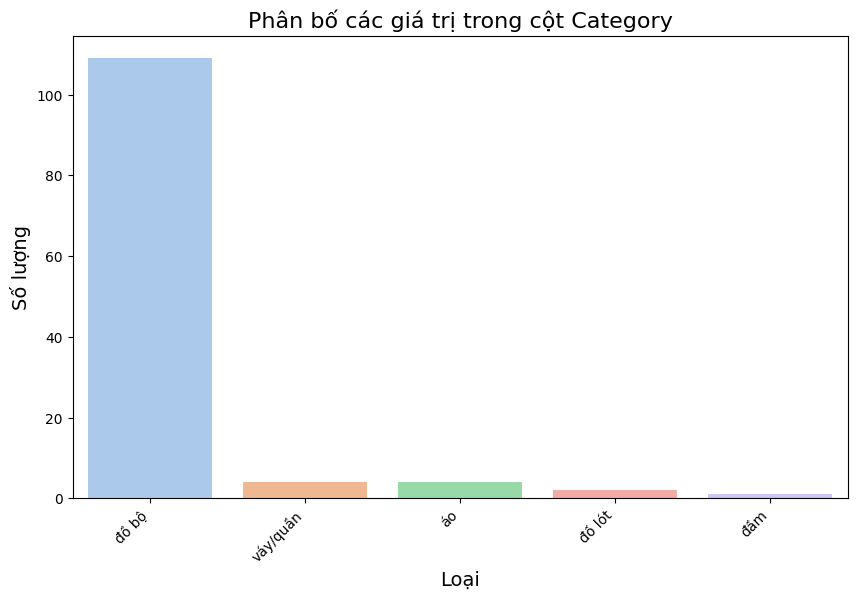

In [346]:
plt.figure(figsize = (10, 6))
sns.barplot(x = Laz_category_counts.index, y = Laz_category_counts.values, palette = 'pastel')
plt.title('Phân bố các giá trị trong cột Category', fontsize = 16)
plt.xlabel('Loại', fontsize = 14)
plt.ylabel('Số lượng', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [347]:
df_Laz_product.to_csv('lazada_products_.csv', index=False)

In [348]:
Laz_avgPrice_per_category = df_Laz_product.groupby('Category')['Price'].mean().round()

In [349]:
print(Laz_avgPrice_per_category)

Category
váy/quần     60125.0
áo          133561.0
đầm          51985.0
đồ bộ        67573.0
đồ lót       42768.0
Name: Price, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\1958800687.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Laz_avgPrice_per_category.index, y = Laz_avgPrice_per_category.values, palette = 'pastel')


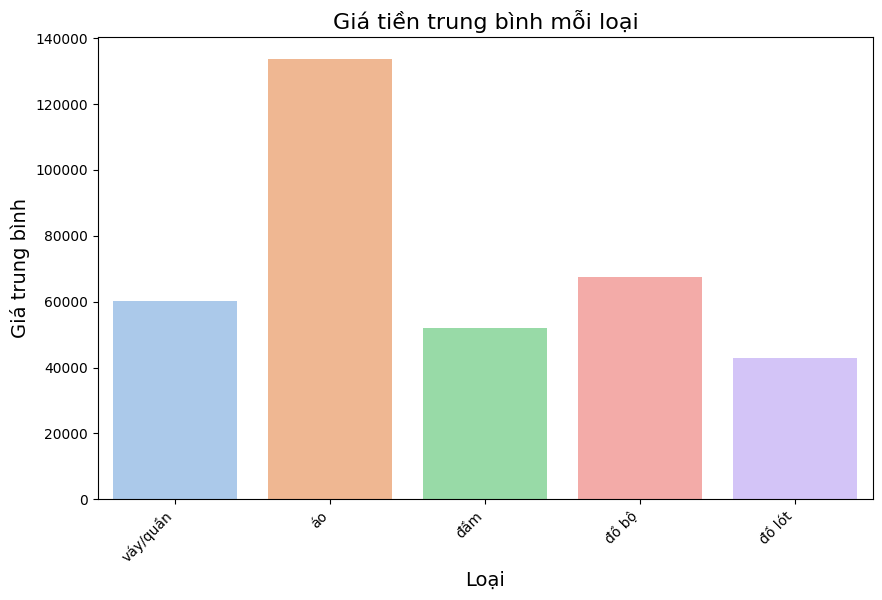

In [350]:
plt.figure(figsize = (10, 6))
sns.barplot(x = Laz_avgPrice_per_category.index, y = Laz_avgPrice_per_category.values, palette = 'pastel')
plt.title('Giá tiền trung bình mỗi loại', fontsize = 16)
plt.xlabel('Loại', fontsize = 14)
plt.ylabel('Giá trung bình', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [351]:
df_Laz_product[df_Laz_product['Category'] == 'áo'][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
26,Đồ Ngủ Gợi Cảm Vải Satiin Đẹp BT FASHION (Yếm ...,35400.0,561,áo
39,ZANZEA Women Vintage Casual Sleeveless Top Ela...,243200.0,0,áo
40,Áo khoác nam Hoodie Chống Nắng WHENEVER Nỉ Bôn...,48999.0,537,áo
98,ZANZEA Korean Style Women's 2pcs Suits New Fas...,206646.0,31,áo


In [352]:
df_Laz_product[df_Laz_product['Price'] == df_Laz_product['Price'].max()][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
23,Recool Short Sleeve Top and Wide Leg Pants Kni...,276051.0,9,đồ bộ


In [353]:
df_Laz_product[df_Laz_product['Price'] == df_Laz_product['Price'].min()][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
51,Quần Short Đùi Nữ Co Giãn Cạp Chun Dáng Ngắn,15000.0,87,váy/quần


In [354]:
df_Laz_product[df_Laz_product['Price'] > 150000][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
23,Recool Short Sleeve Top and Wide Leg Pants Kni...,276051.0,9,đồ bộ
25,⭐Set Baggy Jeans Ống Suông Xám Rách Mix áo rút...,155000.0,168,váy/quần
39,ZANZEA Women Vintage Casual Sleeveless Top Ela...,243200.0,0,áo
56,"MỘT NÚT THÊU KATE, Trang phục truyền thồng, Qu...",152000.0,1400,đồ bộ
63,"Đồ Bộ Nữ Thiết Kế Mới 2024, Set Đồ Nữ, Áo Sát ...",175000.0,53,đồ bộ
98,ZANZEA Korean Style Women's 2pcs Suits New Fas...,206646.0,31,áo
107,"Bộ Áo Cộc Cổ Sơ Mi, Quần Dài, Thiết Kế Lịch Sự...",187000.0,18,đồ bộ
110,"Set Bộ Sát Nách Nữ Thiết Kế, Cổ Áo Sơ Mi Quần ...",192000.0,9,đồ bộ
114,"Quần Áo Nữ Sang Chảnh, Áo Sát Nách Quần suông,...",189000.0,12,đồ bộ


In [355]:
df_Laz_product[(df_Laz_product['Category'] == 'đồ bộ') & (df_Laz_product['Price'] > 150000)][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
23,Recool Short Sleeve Top and Wide Leg Pants Kni...,276051.0,9,đồ bộ
56,"MỘT NÚT THÊU KATE, Trang phục truyền thồng, Qu...",152000.0,1400,đồ bộ
63,"Đồ Bộ Nữ Thiết Kế Mới 2024, Set Đồ Nữ, Áo Sát ...",175000.0,53,đồ bộ
107,"Bộ Áo Cộc Cổ Sơ Mi, Quần Dài, Thiết Kế Lịch Sự...",187000.0,18,đồ bộ
110,"Set Bộ Sát Nách Nữ Thiết Kế, Cổ Áo Sơ Mi Quần ...",192000.0,9,đồ bộ
114,"Quần Áo Nữ Sang Chảnh, Áo Sát Nách Quần suông,...",189000.0,12,đồ bộ


In [356]:
df_Laz_product[(df_Laz_product['Category'] == 'đồ bộ') & (df_Laz_product['Price'] <= 150000)][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
0,Đồ Bộ Nữ Đi Chơi Chất Thun Mát Size M - dưới 5...,39000.0,3900,đồ bộ
1,Sét áo phông tay lỡ phối kẻ + quần kẻ dài mẫu mới,49000.0,23,đồ bộ
2,"Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc xinh xắn",19000.0,458,đồ bộ
3,[ Rẻ Vô Địch ] Tổng hợp các sét quần hoạt hình...,79200.0,265,đồ bộ
4,Set Bộ áo phông BđBcR Nữ Cotton Mix Quần dài K...,49000.0,171,đồ bộ
...,...,...,...,...
113,"Đồ bộ ngủ 2 dây, bộ đồ ngủ mặc nhà quần đùi ch...",55000.0,48,đồ bộ
115,Set quần short đen + áo len sọc xanh QC,52000.0,18,đồ bộ
116,(PH) Set Bộ 3 Áo Ống Kèm Áo Lưới Tay Dài Croto...,105000.0,7,đồ bộ
118,Đồ Bộ Đùi Cổ Tròn Tay Cộc Chất Thun Cotton Su ...,79000.0,0,đồ bộ


In [357]:
df_Laz_product[df_Laz_product['Price'] > 150000]['Category'].value_counts()

Category
đồ bộ       6
áo          2
váy/quần    1
Name: count, dtype: int64

In [358]:
df_Laz_product[df_Laz_product['Price'] <= 150000]['Category'].value_counts()

Category
đồ bộ       103
váy/quần      3
áo            2
đồ lót        2
đầm           1
Name: count, dtype: int64

In [359]:
df_Laz_product_dobo = df_Laz_product[df_Laz_product['Category'] == 'đồ bộ'].copy(deep = True)
df_Laz_product_dobo['Phân khúc'] = df_Laz_product_dobo['Price'].apply(lambda x: 1 if x > 150000 else 0)

In [360]:
df_Laz_product_dobo

,Url,Name,Price,Sold,Category,Phân khúc
0,https://www.lazada.vn/products/do-bo-nu-di-cho...,Đồ Bộ Nữ Đi Chơi Chất Thun Mát Size M - dưới 5...,39000.0,3900,đồ bộ,0
1,https://www.lazada.vn/products/set-ao-phong-ta...,Sét áo phông tay lỡ phối kẻ + quần kẻ dài mẫu mới,49000.0,23,đồ bộ,0
2,https://www.lazada.vn/products/bo-pijama-do-bo...,"Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc xinh xắn",19000.0,458,đồ bộ,0
3,https://www.lazada.vn/products/re-vo-dich-tong...,[ Rẻ Vô Địch ] Tổng hợp các sét quần hoạt hình...,79200.0,265,đồ bộ,0
4,https://www.lazada.vn/products/set-bo-ao-phong...,Set Bộ áo phông BđBcR Nữ Cotton Mix Quần dài K...,49000.0,171,đồ bộ,0
...,...,...,...,...,...,...
114,https://www.lazada.vn/products/quan-ao-nu-sang...,"Quần Áo Nữ Sang Chảnh, Áo Sát Nách Quần suông,...",189000.0,12,đồ bộ,1
115,https://www.lazada.vn/products/set-quan-short-...,Set quần short đen + áo len sọc xanh QC,52000.0,18,đồ bộ,0
116,https://www.lazada.vn/products/ph-set-bo-3-ao-...,(PH) Set Bộ 3 Áo Ống Kèm Áo Lưới Tay Dài Croto...,105000.0,7,đồ bộ,0
118,https://www.lazada.vn/products/do-bo-dui-co-tr...,Đồ Bộ Đùi Cổ Tròn Tay Cộc Chất Thun Cotton Su ...,79000.0,0,đồ bộ,0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\591534270.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Phân khúc', y='Số lượng sản phẩm', data=count_by_segment, palette='pastel')


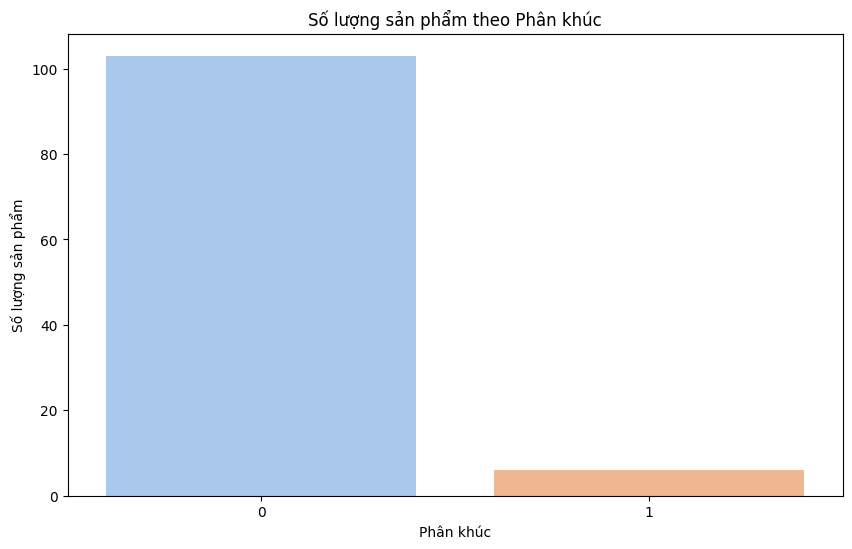

In [361]:
count_by_segment = df_Laz_product_dobo['Phân khúc'].value_counts().reset_index()
count_by_segment.columns = ['Phân khúc', 'Số lượng sản phẩm']

plt.figure(figsize=(10, 6))
sns.barplot(x='Phân khúc', y='Số lượng sản phẩm', data=count_by_segment, palette='pastel')
plt.title('Số lượng sản phẩm theo Phân khúc')
plt.xlabel('Phân khúc')
plt.ylabel('Số lượng sản phẩm')
plt.show()

In [362]:
df_Laz_product[df_Laz_product['Category'] == 'đồ bộ']['Price'].describe()

count       109.000000
mean      67572.642202
std       40098.168726
min       19000.000000
25%       41000.000000
50%       55500.000000
75%       83000.000000
max      276051.000000
Name: Price, dtype: float64

In [363]:
df_Laz_product[df_Laz_product['Category'] == 'đồ bộ'][['Name', 'Price', 'Sold', 'Category']]

,Name,Price,Sold,Category
0,Đồ Bộ Nữ Đi Chơi Chất Thun Mát Size M - dưới 5...,39000.0,3900,đồ bộ
1,Sét áo phông tay lỡ phối kẻ + quần kẻ dài mẫu mới,49000.0,23,đồ bộ
2,"Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc xinh xắn",19000.0,458,đồ bộ
3,[ Rẻ Vô Địch ] Tổng hợp các sét quần hoạt hình...,79200.0,265,đồ bộ
4,Set Bộ áo phông BđBcR Nữ Cotton Mix Quần dài K...,49000.0,171,đồ bộ
...,...,...,...,...
114,"Quần Áo Nữ Sang Chảnh, Áo Sát Nách Quần suông,...",189000.0,12,đồ bộ
115,Set quần short đen + áo len sọc xanh QC,52000.0,18,đồ bộ
116,(PH) Set Bộ 3 Áo Ống Kèm Áo Lưới Tay Dài Croto...,105000.0,7,đồ bộ
118,Đồ Bộ Đùi Cổ Tròn Tay Cộc Chất Thun Cotton Su ...,79000.0,0,đồ bộ


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\2429509977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price', data=df_Laz_product, palette='Set2')


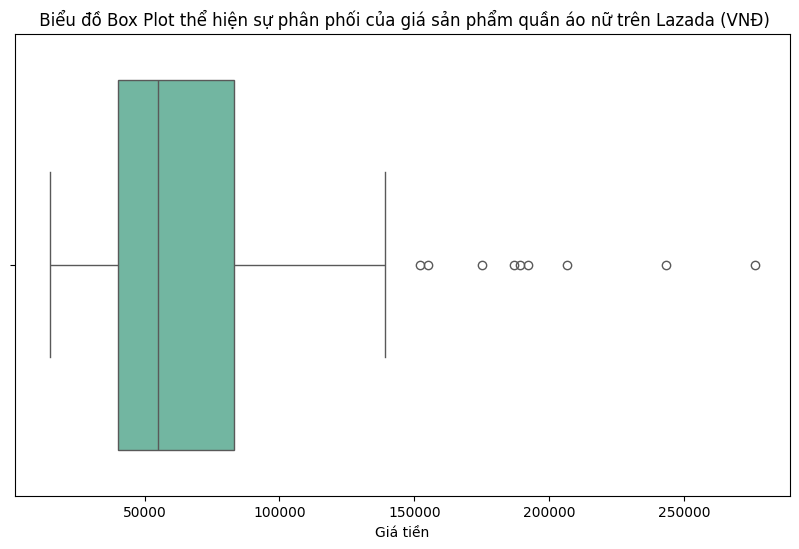

In [364]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=df_Laz_product, palette='Set2')
plt.title(' Biểu đồ Box Plot thể hiện sự phân phối của giá sản phẩm quần áo nữ trên Lazada (VNĐ)')
plt.xlabel('Giá tiền')
plt.ylabel('')
plt.show()

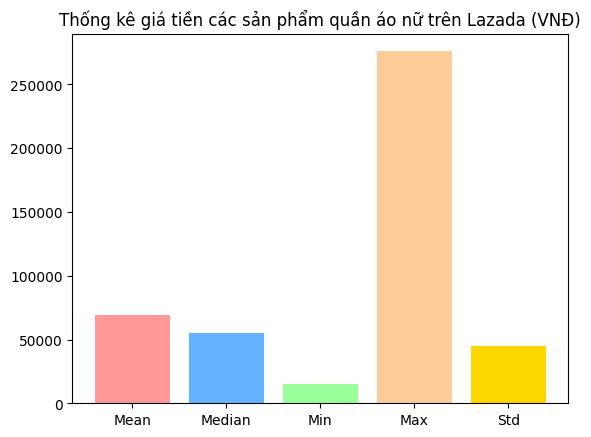

In [365]:
stats = {
    'Mean': df_Laz_product['Price'].mean(),
    'Median': df_Laz_product['Price'].median(),
    'Min': df_Laz_product['Price'].min(),
    'Max': df_Laz_product['Price'].max(),
    'Std': df_Laz_product['Price'].std()
}

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.bar(stats.keys(), stats.values(), color = colors)
plt.title('Thống kê giá tiền các sản phẩm quần áo nữ trên Lazada (VNĐ)')
plt.show()

Run this cell if the computer hasn't installed the scikit-learn libraries yet

In [366]:
# !pip install scikit-learn

In [367]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

cluster_price = df_Laz_product.copy(deep = True)

prices = cluster_price[['Price']].values
scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices)

dbscan = DBSCAN(eps = 0.5, min_samples = 5)
cluster_price['Cluster_DBSCAN'] = dbscan.fit_predict(prices_scaled)

print(cluster_price)

                                                   Url  \
0    https://www.lazada.vn/products/do-bo-nu-di-cho...   
1    https://www.lazada.vn/products/set-ao-phong-ta...   
2    https://www.lazada.vn/products/bo-pijama-do-bo...   
3    https://www.lazada.vn/products/re-vo-dich-tong...   
4    https://www.lazada.vn/products/set-bo-ao-phong...   
..                                                 ...   
115  https://www.lazada.vn/products/set-quan-short-...   
116  https://www.lazada.vn/products/ph-set-bo-3-ao-...   
117  https://www.lazada.vn/products/quan-dui-nu-mac...   
118  https://www.lazada.vn/products/do-bo-dui-co-tr...   
119  https://www.lazada.vn/products/quan-ao-phu-nu-...   

                                                  Name     Price  Sold  \
0    Đồ Bộ Nữ Đi Chơi Chất Thun Mát Size M - dưới 5...   39000.0  3900   
1    Sét áo phông tay lỡ phối kẻ + quần kẻ dài mẫu mới   49000.0    23   
2        Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc xinh xắn   19000.0   458   
3    [ 

In [368]:
cluster_price[cluster_price['Cluster_DBSCAN'] == 0][['Price', 'Cluster_DBSCAN']].describe()

,Price,Cluster_DBSCAN
count,118.000000,118.0
mean,65749.440678,0.0
std,37567.577908,0.0
min,15000.000000,0.0
25%,40000.000000,0.0
50%,54892.000000,0.0
75%,80442.250000,0.0
max,206646.000000,0.0


In [369]:
cluster_price[cluster_price['Cluster_DBSCAN'] != 0][['Price', 'Cluster_DBSCAN']].describe()

,Price,Cluster_DBSCAN
count,2.000000,2.0
mean,259625.500000,-1.0
std,23229.164869,0.0
min,243200.000000,-1.0
25%,251412.750000,-1.0
50%,259625.500000,-1.0
75%,267838.250000,-1.0
max,276051.000000,-1.0


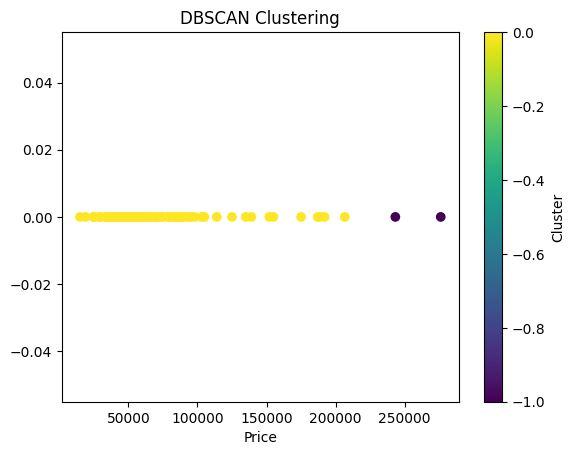

In [370]:
plt.scatter(cluster_price['Price'], np.zeros_like(cluster_price['Price']),
            c=cluster_price['Cluster_DBSCAN'], cmap='viridis', marker='o')
plt.xlabel('Price')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\1320482987.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Phân khúc', y='Số lượng sản phẩm', data=count_by_segment, palette='pastel')


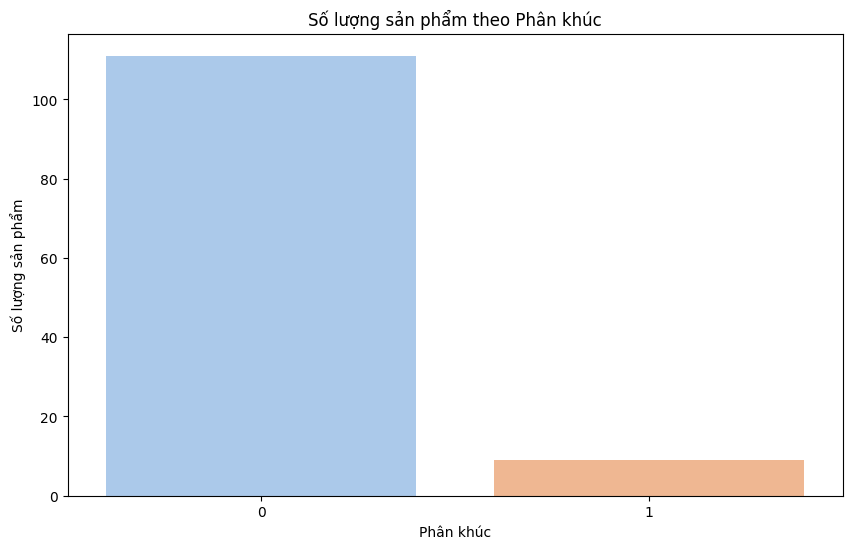

In [371]:
df_Laz_product_pk = df_Laz_product.copy(deep = True)
df_Laz_product_pk['Phân khúc'] = df_Laz_product_pk['Price'].apply(lambda x: 1 if x > 150000 else 0)

count_by_segment = df_Laz_product_pk['Phân khúc'].value_counts().reset_index()
count_by_segment.columns = ['Phân khúc', 'Số lượng sản phẩm']

plt.figure(figsize=(10, 6))
sns.barplot(x='Phân khúc', y='Số lượng sản phẩm', data=count_by_segment, palette='pastel')
plt.title('Số lượng sản phẩm theo Phân khúc')
plt.xlabel('Phân khúc')
plt.ylabel('Số lượng sản phẩm')
plt.show()

In [372]:
df_Laz_product['Sold'].sum()

70683

In [373]:
df_Laz_product['Sold'].describe()

count      120.000000
mean       589.025000
std       1369.368102
min          0.000000
25%         23.750000
50%        111.500000
75%        433.250000
max      10100.000000
Name: Sold, dtype: float64

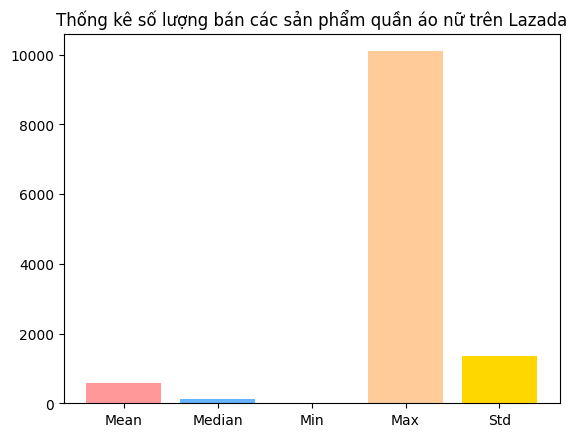

In [374]:
stats = {
    'Mean': df_Laz_product['Sold'].mean(),
    'Median': df_Laz_product['Sold'].median(),
    'Min': df_Laz_product['Sold'].min(),
    'Max': df_Laz_product['Sold'].max(),
    'Std': df_Laz_product['Sold'].std()
}

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.bar(stats.keys(), stats.values(), color = colors)
plt.title('Thống kê số lượng bán các sản phẩm quần áo nữ trên Lazada')
plt.show()

In [375]:
df_Laz_product[df_Laz_product['Sold'] == 0]

,Url,Name,Price,Sold,Category
38,https://www.lazada.vn/products/bo-do-ngu-nam-n...,Winter Adults Animal Dinosaur Onesies Women Me...,90000.0,0,đồ bộ
39,https://www.lazada.vn/products/kieu-co-dien-ch...,ZANZEA Women Vintage Casual Sleeveless Top Ela...,243200.0,0,áo
78,https://www.lazada.vn/products/re-vo-dich-set-...,[Rẻ vô địch] Set Bộ Quần Ống leo chất umi+ mix...,84000.0,0,đồ bộ
79,https://www.lazada.vn/products/weci-do-ngu-goi...,WECI Sexy Pyjamas Straps Lace Lingerie Sleepin...,51985.0,0,đầm
118,https://www.lazada.vn/products/do-bo-dui-co-tr...,Đồ Bộ Đùi Cổ Tròn Tay Cộc Chất Thun Cotton Su ...,79000.0,0,đồ bộ
119,https://www.lazada.vn/products/quan-ao-phu-nu-...,Pajama Women's Summer Loose Nightgown Women Ko...,98000.0,0,đồ bộ


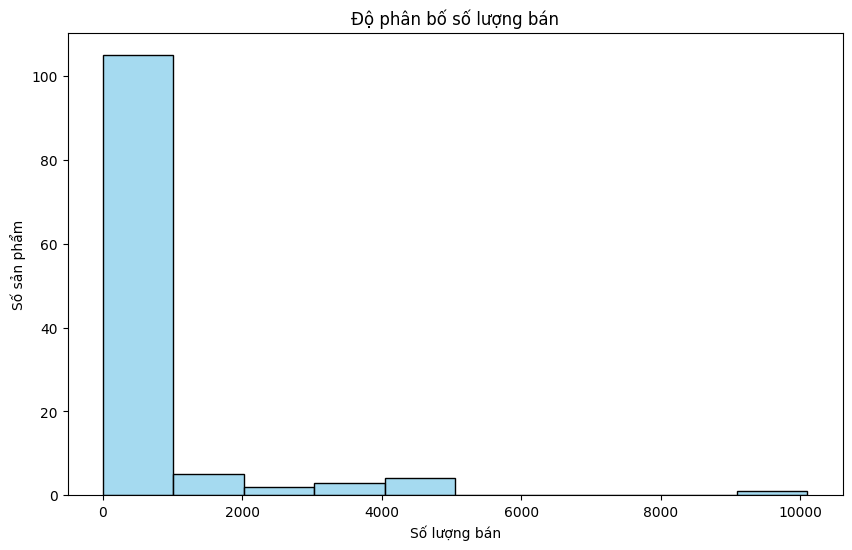

In [376]:
plt.figure(figsize=(10, 6))
sns.histplot(df_Laz_product['Sold'], bins=10, kde=False, color='skyblue')
plt.title('Độ phân bố số lượng bán')
plt.xlabel('Số lượng bán')
plt.ylabel('Số sản phẩm')
plt.show()

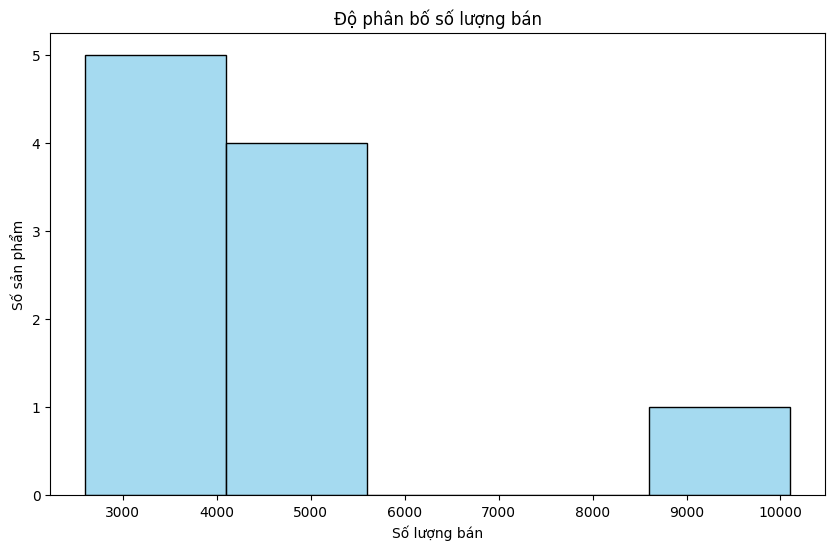

In [377]:
plt.figure(figsize=(10, 6))
sns.histplot(df_Laz_product[df_Laz_product['Sold'] > 2000]['Sold'], bins=5, kde=False, color='skyblue')
plt.title('Độ phân bố số lượng bán')
plt.xlabel('Số lượng bán')
plt.ylabel('Số sản phẩm')
plt.show()

In [378]:
df_Laz_product[df_Laz_product['Sold'] > 4000]

,Url,Name,Price,Sold,Category
16,https://www.lazada.vn/products/bo-pijama-do-bo...,"Bộ Pijama, Đồ Bộ Mặc Nhà Nữ Dáng Cộc Dễ Thương...",29000.0,5000,đồ bộ
19,https://www.lazada.vn/products/co-size-70kg-do...,"CÓ SIZE 70KG ĐỒ BỘ QUẦN ÁO THUN ĐŨA, THUN ĐÙI ...",54784.0,4400,đồ bộ
72,https://www.lazada.vn/products/set-ao-phong-ga...,"Sét Áo phông Gấu Happy + quần bom karo, Áo phô...",56000.0,4500,đồ bộ
84,https://www.lazada.vn/products/bo-do-cotton-nu...,Bộ đồ cotton nữ - set đồ nữ thời trang mặc nhà...,49000.0,10100,đồ bộ
91,https://www.lazada.vn/products/set-bo-croptop-...,Set bộ croptop quần bo chun mix áo croptop cọc...,61500.0,4500,đồ bộ


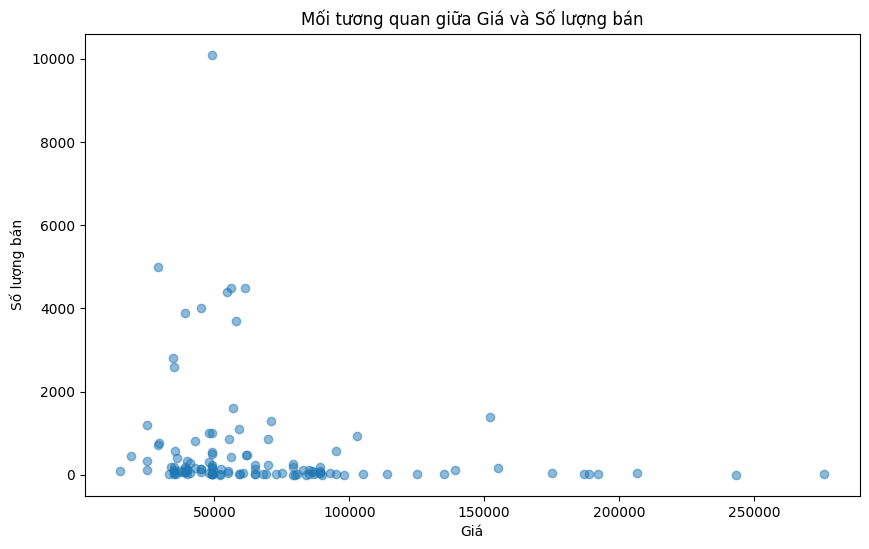

In [379]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Laz_product['Price'], df_Laz_product['Sold'], alpha=0.5)
plt.title('Mối tương quan giữa Giá và Số lượng bán')
plt.xlabel('Giá')
plt.ylabel('Số lượng bán')
plt.show()

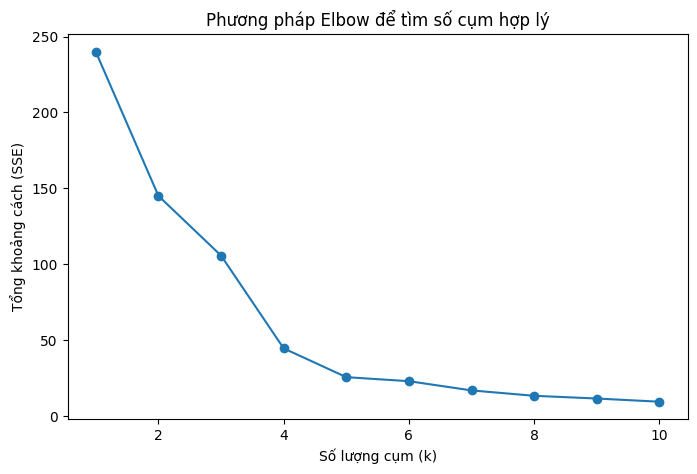

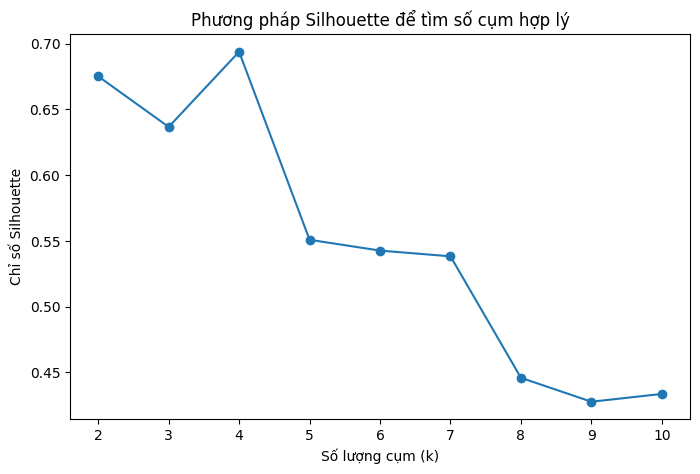

In [380]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

df_Laz_product_kmeans = df_Laz_product[['Price', 'Sold']].copy(deep = True)
X = df_Laz_product_kmeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Phương pháp Elbow
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # inertia_ là tổng khoảng cách từ điểm đến tâm cụm

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Tổng khoảng cách (SSE)')
plt.title('Phương pháp Elbow để tìm số cụm hợp lý')
plt.show()

# Phương pháp Silhouette
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Chỉ số Silhouette')
plt.title('Phương pháp Silhouette để tìm số cụm hợp lý')
plt.show()

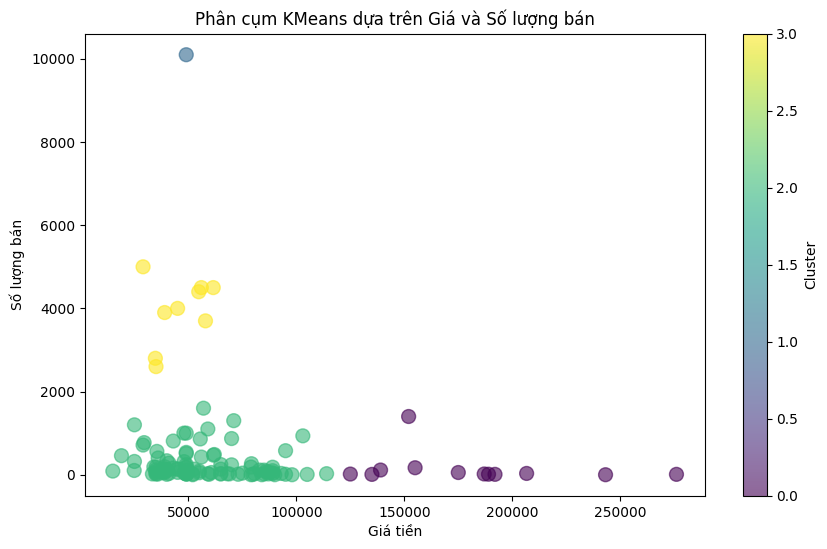

In [381]:
from sklearn.cluster import KMeans

df_Laz_product_kmeans = df_Laz_product[['Price', 'Sold']].copy(deep = True)
X = df_Laz_product_kmeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
df_Laz_product_kmeans['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_Laz_product_kmeans['Price'], df_Laz_product_kmeans['Sold'], c=df_Laz_product_kmeans['Cluster'], cmap='viridis', alpha=0.6, s=100)
plt.title('Phân cụm KMeans dựa trên Giá và Số lượng bán')
plt.xlabel('Giá tiền')
plt.ylabel('Số lượng bán')
plt.colorbar(label='Cluster')
plt.show()

In [382]:
df_Laz_product_kmeans[df_Laz_product_kmeans['Cluster'] == 1]

,Price,Sold,Cluster
84,49000.0,10100,1


In [383]:
df_Laz_product['Product_Object'] = df_Laz_product_kmeans['Cluster']

In [384]:
df_Laz_product[df_Laz_product['Product_Object'] == 1] = 3

In [385]:
df_Laz_product['Product_Object'] = df_Laz_product['Product_Object'].apply(lambda x: 1 if x == 2 else 2 if x == 0 else 3 if x == 3 else x)

### df_Laz_feedback

In [386]:
df_Laz_feedback.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8899 entries, 0 to 9786
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_Url  8899 non-null   object
 1   Content      8899 non-null   object
dtypes: object(2)
memory usage: 208.6+ KB


In [387]:
set(list(df_Laz_feedback['Product_Url']))

{'https://www.lazada.vn/products/2-size-45-70kg-do-bo-dui-nut-sau-phom-suong-vai-dui-linen-sieu-de-thuong-mem-mat-khong-nhan-thoi-trang-i1086020403.html',
 'https://www.lazada.vn/products/3-size-43-65kg-do-bo-gau-tam-theu-chu-bt-quan-phoi-ke-thoi-trang-chat-thun-cotton-co-gian-i255868021.html',
 'https://www.lazada.vn/products/ao-khoac-nam-hoodie-chong-nang-whenever-ni-bong-in-noi-form-rong-nam-nu-mua-dong-cap-doi-unisex-dang-boxy-thoi-trang-ba-mau-g8_shop-01-i2590505300.html',
 'https://www.lazada.vn/products/bigsize-45-95kg-set-vay-nu-bo-do-ao-co-v-phoi-mau-bo-det-tay-ngan-kem-chan-vay-thoi-trang-du-tiec-xinh-i2633215018.html',
 'https://www.lazada.vn/products/bo-ao-coc-co-so-mi-quan-dai-thiet-ke-lich-su-tre-trung-ma-e41-i2751041715.html',
 'https://www.lazada.vn/products/bo-ao-phong-ke-tay-quan-ke-chat-cotton-mat-min-nam-nu-hottrend-2024-i2688191229.html',
 'https://www.lazada.vn/products/bo-ao-thun-ngan-tay-dang-rong-quan-short-denim-lung-cao-phong-cach-the-thao-thoi-trang-mua-he-c

In [388]:
len(set(list(df_Laz_feedback['Product_Url'])))

106

In [389]:
feedbacks = df_Laz_feedback['Content']

In [390]:
import re
def text_preprocess(text):
    text = text.lower()
    text = re.sub(r'([:,./?:#()])', r' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.split()

In [391]:
feedbacks = [text_preprocess(fb) for fb in feedbacks]

Run this cell if the computer hasn't installed the gensim library yet

In [392]:
# !pip install gensim

In [393]:
from gensim.models import Word2Vec
model = Word2Vec(feedbacks, vector_size=100, window=10, min_count=1, workers=4)

In [394]:
similar_words = model.wv.most_similar('tốt', topn=20)
print(similar_words)

[('đến', 0.7834832668304443), ('từng', 0.7768322825431824), ('chú', 0.7744055390357971), ('giúp', 0.7495654821395874), ('chi', 0.7354433536529541), ('sử', 0.731519877910614), ('sản', 0.7279497981071472), ('sự', 0.7000299692153931), ('dụng', 0.6971355676651001), ('lượng', 0.6897048354148865), ('tùi', 0.6893662810325623), ('cấp', 0.6799376606941223), ('bền', 0.6773099899291992), ('đạt', 0.6752036809921265), ('phẩm', 0.6735767722129822), ('họp', 0.6702637076377869), ('hiao', 0.6627333760261536), ('làm', 0.6618338227272034), ('tin1', 0.6610690951347351), ('iy', 0.6597250699996948)]


In [395]:
similar_words = model.wv.most_similar('đẹp', topn=20)
print(similar_words)

[('đũi', 0.8093051910400391), ('dày', 0.7695475220680237), ('dặn', 0.7613062262535095), ('vải', 0.747982382774353), ('sờ', 0.7377477288246155), ('form', 0.7326503396034241), ('rõ', 0.7135416865348816), ('okokokokokookokokok', 0.7103628516197205), ('lắm', 0.7049573659896851), ('mát', 0.6977057456970215), ('fom', 0.6779327392578125), ('dầy', 0.6778923273086548), ('chuẩn', 0.6736229062080383), ('maqcj', 0.6723077297210693), ('xxxl', 0.6686182618141174), ('vãi', 0.667121171951294), ('khoongg', 0.6666716933250427), ('tăm', 0.6639189720153809), ('vò', 0.6597411036491394), ('êm', 0.6577392220497131)]


In [396]:
similar_words = model.wv.most_similar('tệ', topn=10)
print(similar_words)

[('vọng', 0.9749670028686523), ('mặt', 0.9725046753883362), ('quân', 0.9690565466880798), ('im', 0.9660614132881165), ('dc', 0.9653695821762085), ('hay', 0.9645029306411743), ('wa', 0.9643678069114685), ('thất', 0.9639868140220642), ('nghĩ', 0.9638844728469849), ('kì', 0.9638561010360718)]


In [397]:
similar_words = model.wv.most_similar('xấu', topn=10)
print(similar_words)

[('cứng', 0.9731060266494751), ('thô', 0.9621569514274597), ('vãi', 0.9581981897354126), ('fom', 0.9576799869537354), ('cx', 0.9524962306022644), ('nilong', 0.945608913898468), ('nhìn', 0.9440159797668457), ('kh', 0.9433452486991882), ('tí', 0.9378594160079956), ('đũng', 0.9293200373649597)]


In [398]:
similar_words = model.wv.most_similar('ổn', topn=5)
print(similar_words)

[('tạm', 0.941509485244751), ('cũng', 0.9345096945762634), ('so', 0.9193424582481384), ('chung', 0.9076210260391235), ('vs', 0.8989613056182861)]


In [399]:
from nltk import ngrams

positive_words = ['tuyệt vời', 'hài lòng', 'thích', 'đẹp', 'mát', 'xinh', 'mát', 'dày dặn', 'ưng ý', 'lý tưởng', 'hấp dẫn', 'hoàn hảo', 'thoải mái', 'mê', 'tốt', 'ưng', 'bền', 'vừa ý', 'dễ thương', 'cute', 'đáng mua', 'nên mua']
negative_words = ['không hài lòng', 'thất vọng', 'kém', 'xấu', 'tệ', 'gớm', 'chán', 'nóng', 'lỗi', 'khó chịu', 'kì', 'cứng', 'thấy ghê', 'hơi', 'mắc', 'đắt', 'không đúng', 'ko đúng', 'vớ vẩn', 'ni lông', 'nilon', 'không thích', 'ko thích', 'ko ưng', 'phải chi', 'thô']

def calculate_satisfaction_score(review):
    score = 0
    for word in review:
        if word in positive_words:
            score += 1 
        elif word in negative_words:
            score -= 1 

    bigrams = ngrams(review, 2)
    for bigram in bigrams:
        bigram_str = ' '.join(bigram)
        if bigram_str in positive_words:
            score += 1 
        elif bigram_str in negative_words:
            score -= 1 

    return score

satisfaction_scores = [calculate_satisfaction_score(fb) for fb in feedbacks]
df_Laz_feedback['SentScore'] = satisfaction_scores

In [400]:
df_Laz_feedback[['Content', 'SentScore']]

,Content,SentScore
0,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...,0
3,"Vừa vặn và tôn dáng, Thiết kế thời trang cho v...",2
5,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...,0
10,"Chất liệu thoáng mát và thoải mái, Vừa vặn tốt...",4
11,"Vừa vặn và tôn dáng, Thiết kế thời trang cho v...",2
...,...,...
9781,"cái quần không có nút sao xài , làm ăn gian dố...",0
9782,"quần tạm đc, đặt màu đen giao màu trắng.",0
9783,"quần tạm đc, giao đúng màu.",0
9785,"ba con coi ne,mua mâu nay giao mâu khac gi ma ...",0


In [401]:
def get_review_vector(review):
    words = review
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [402]:
def classify_score(score):
    if score < 0:
        return 0
    elif score == 0:
        return 1
    else:
        return 2

In [403]:
labels = df_Laz_feedback['SentScore'].apply(classify_score)

In [404]:
df_Laz_feedback['Label'] = labels

In [405]:
df_Laz_feedback['Label'].value_counts()

Label
2    5239
1    2962
0     698
Name: count, dtype: int64

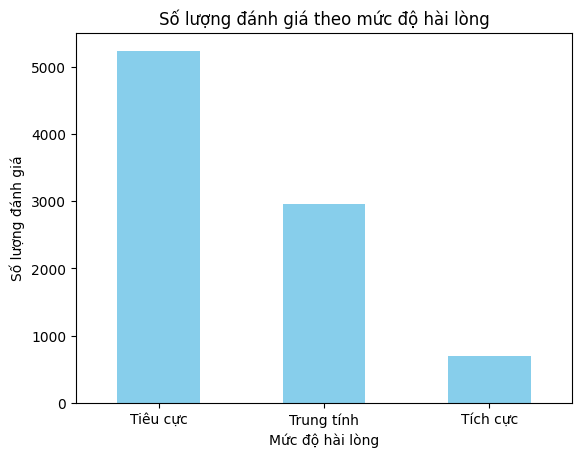

In [406]:
df_Laz_feedback['Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Số lượng đánh giá theo mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Số lượng đánh giá')
plt.xticks(ticks=[0, 1, 2], labels=['Tiêu cực', 'Trung tính', 'Tích cực'], rotation=0)
plt.show()

Run this cell if the computer hasn't installed the wordcloud library yet

In [407]:
# !pip install wordcloud

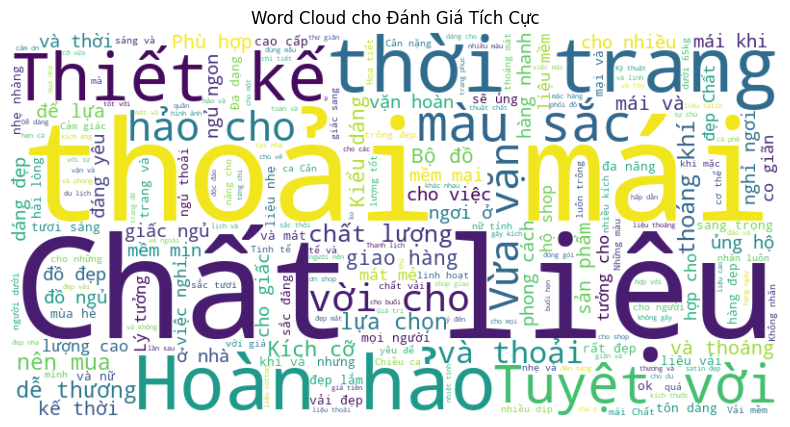

In [408]:
from wordcloud import WordCloud

positive_comments = ' '.join(df_Laz_feedback[df_Laz_feedback['Label'] == 2]['Content'])
neutral_comments = ' '.join(df_Laz_feedback[df_Laz_feedback['Label'] == 1]['Content'])
negative_comments = ' '.join(df_Laz_feedback[df_Laz_feedback['Label'] == 0]['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho Đánh Giá Tích Cực')
plt.show()

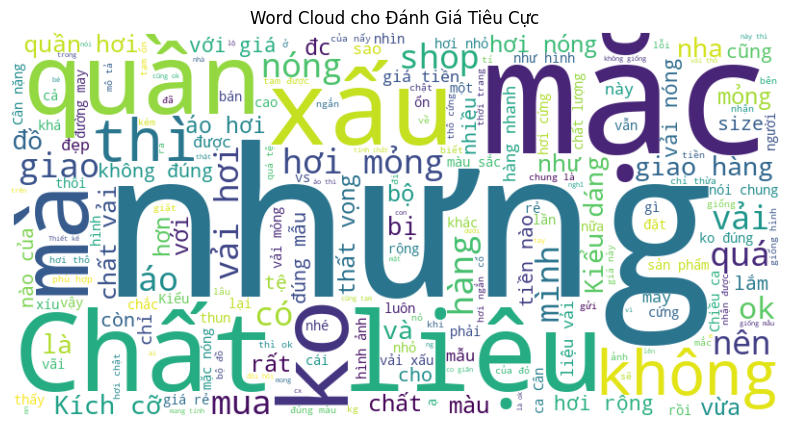

In [409]:
from wordcloud import WordCloud

positive_comments = ' '.join(df_Laz_feedback[df_Laz_feedback['Label'] == 2]['Content'])
neutral_comments = ' '.join(df_Laz_feedback[df_Laz_feedback['Label'] == 1]['Content'])
negative_comments = ' '.join(df_Laz_feedback[df_Laz_feedback['Label'] == 0]['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho Đánh Giá Tiêu Cực')
plt.show()

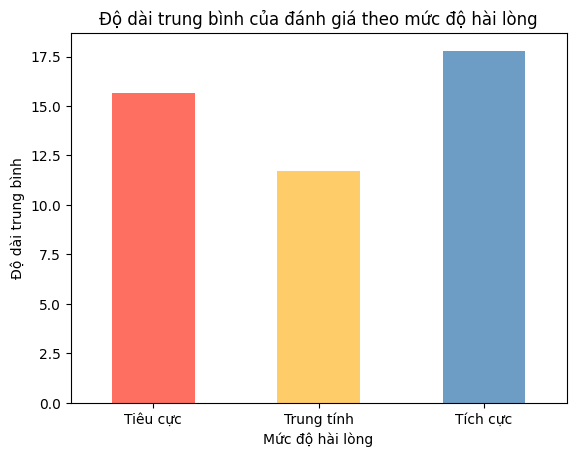

In [410]:
df_Laz_feedback['Length'] = df_Laz_feedback['Content'].str.split().str.len()
mean_length = df_Laz_feedback.groupby('Label')['Length'].mean()

colors = ['#FF6F61', '#FFCC6A', '#6D9DC5']
mean_length.plot(kind='bar', color=colors)

plt.title('Độ dài trung bình của đánh giá theo mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Độ dài trung bình')
plt.xticks(ticks=[0, 1, 2], labels=['Tiêu cực', 'Trung tính', 'Tích cực'], rotation=0)
plt.show()

In [411]:
df_Laz_feedback['Length'].mean()

15.599280818069445

In [412]:
mean_length

Label
0    15.651862
1    11.698852
2    17.797480
Name: Length, dtype: float64

In [413]:
df_merged = pd.merge(df_Laz_feedback, df_Laz_product, left_on='Product_Url', right_on='Url')

In [414]:
df_merged['Category'].value_counts()

Category
đồ bộ       8073
váy/quần     637
đồ lót        98
áo            62
đầm            3
Name: count, dtype: int64

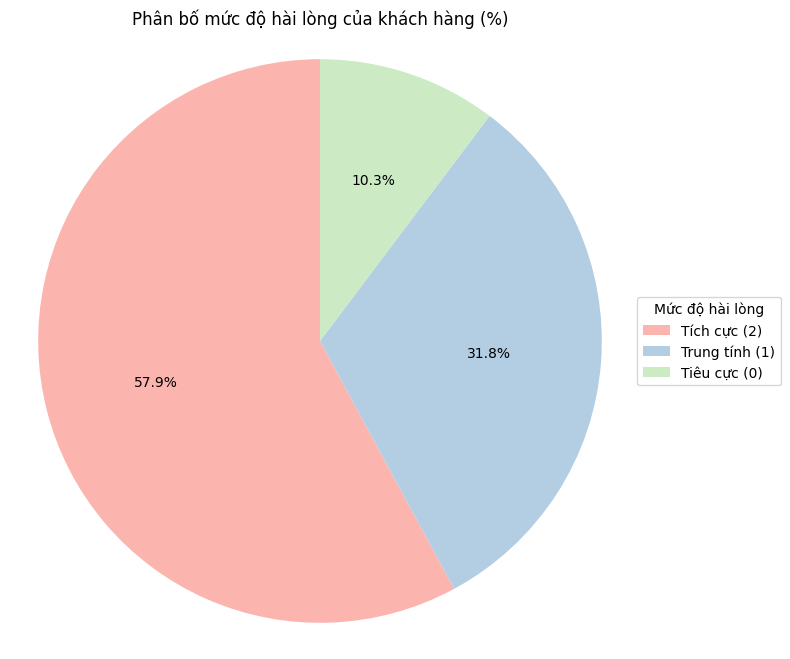

In [499]:
label_counts = df_merged['Label'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(label_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)

labels = ['Tích cực (2)', 'Trung tính (1)', 'Tiêu cực (0)']
plt.legend(wedges, labels, title="Mức độ hài lòng", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Phân bố mức độ hài lòng của khách hàng (%)')
plt.axis('equal')
plt.show()


In [416]:
df_merged['Label'].value_counts()

Label
2    5239
1    2946
0     688
Name: count, dtype: int64

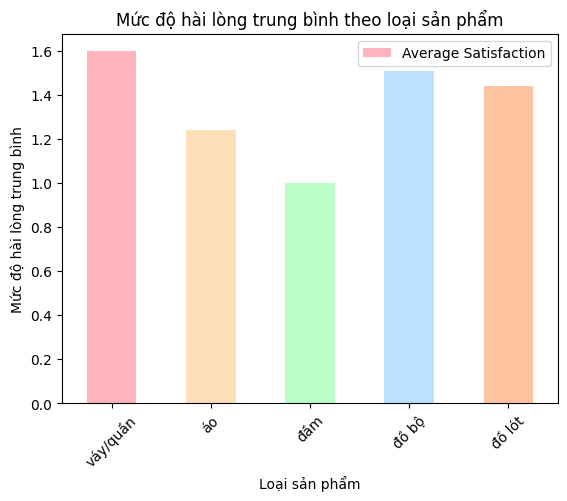

In [417]:
category_feedback = df_merged.groupby('Category')['Label'].mean().reset_index()
category_feedback.columns = ['Category', 'Average Satisfaction']

pastel_colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9', '#BAE1FF', '#FFC3A0', '#FF677D']
category_feedback.plot(kind='bar', x='Category', y='Average Satisfaction', color=pastel_colors[:len(category_feedback)])
plt.title('Mức độ hài lòng trung bình theo loại sản phẩm')
plt.xlabel('Loại sản phẩm')
plt.ylabel('Mức độ hài lòng trung bình')
plt.xticks(rotation=45)
plt.show()

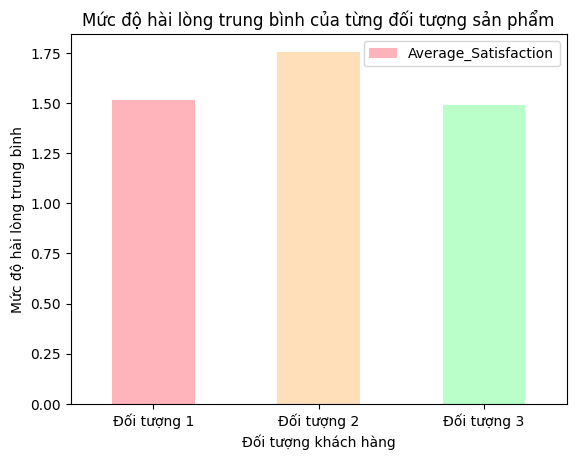

In [418]:
product_satisfaction = df_merged.groupby('Product_Object')['Label'].mean().reset_index()
product_satisfaction.columns = ['Product_Object', 'Average_Satisfaction']

pastel_colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9', '#BAE1FF', '#FF677D', '#FFC3A0']
product_satisfaction.plot(kind='bar', x='Product_Object', y='Average_Satisfaction', color=pastel_colors[:len(product_satisfaction)])
plt.title('Mức độ hài lòng trung bình của từng đối tượng sản phẩm')
plt.xlabel('Đối tượng khách hàng')
plt.ylabel('Mức độ hài lòng trung bình')
plt.xticks(ticks=[0, 1, 2], labels=['Đối tượng 1', 'Đối tượng 2', 'Đối tượng 3'], rotation=0)
plt.show()

In [419]:
df_merged['Label'].mean()

1.5129043164656824

In [420]:
product_satisfaction

,Product_Object,Average_Satisfaction
0,1,1.518103
1,2,1.756579
2,3,1.489077


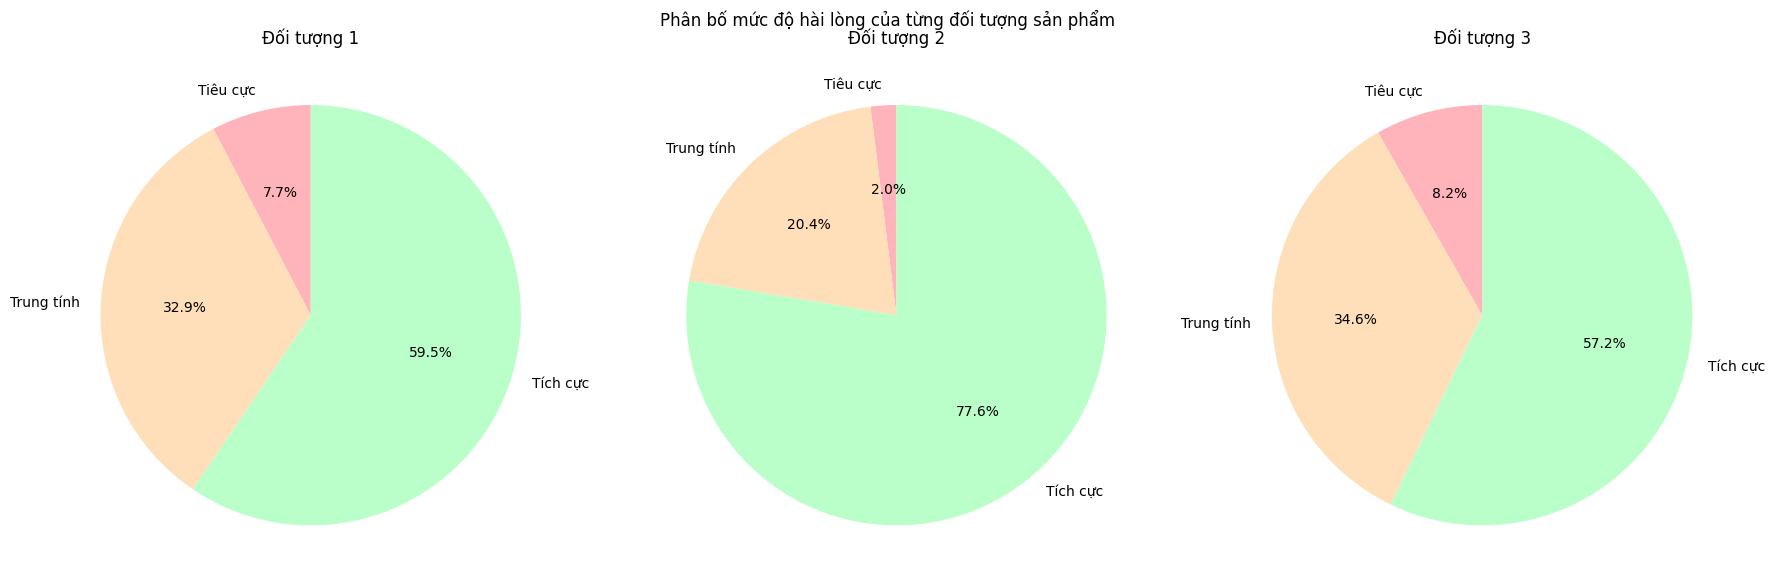

In [421]:
label_distribution = df_merged.groupby(['Product_Object', 'Label']).size().unstack().fillna(0)

labels = ['Tiêu cực', 'Trung tính', 'Tích cực']
colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, Product_Object in enumerate(label_distribution.index):
    axes[i].pie(label_distribution.loc[Product_Object], 
                labels=labels, 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=colors)
    axes[i].set_title(f'Đối tượng {Product_Object}')

plt.suptitle('Phân bố mức độ hài lòng của từng đối tượng sản phẩm')
plt.tight_layout()
plt.show()

In [422]:
df_Laz_feedback

,Product_Url,Content,SentScore,Label,Length
0,https://www.lazada.vn/products/do-bo-nu-di-cho...,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...,0,1,49
3,https://www.lazada.vn/products/do-bo-nu-di-cho...,"Vừa vặn và tôn dáng, Thiết kế thời trang cho v...",2,2,30
5,https://www.lazada.vn/products/do-bo-nu-di-cho...,Màu sắc đẹp hình in rõ nét mà vải mỏng quá mỏn...,0,1,49
10,https://www.lazada.vn/products/do-bo-nu-di-cho...,"Chất liệu thoáng mát và thoải mái, Vừa vặn tốt...",4,2,23
11,https://www.lazada.vn/products/do-bo-nu-di-cho...,"Vừa vặn và tôn dáng, Thiết kế thời trang cho v...",2,2,30
...,...,...,...,...,...
9781,https://www.lazada.vn/products/quan-dui-nu-mac...,"cái quần không có nút sao xài , làm ăn gian dố...",0,1,22
9782,https://www.lazada.vn/products/quan-dui-nu-mac...,"quần tạm đc, đặt màu đen giao màu trắng.",0,1,9
9783,https://www.lazada.vn/products/quan-dui-nu-mac...,"quần tạm đc, giao đúng màu.",0,1,6
9785,https://www.lazada.vn/products/do-bo-dui-co-tr...,"ba con coi ne,mua mâu nay giao mâu khac gi ma ...",0,1,37


## Tiki

### df_Tiki_product

In [423]:
df_Tiki_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Url       120 non-null    object 
 1   Name      120 non-null    object 
 2   Price     120 non-null    float64
 3   Sold      120 non-null    int64  
 4   Category  120 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.8+ KB


In [424]:
df_Tiki_product.describe()

,Price,Sold
count,120.000000,120.000000
mean,177409.466667,23.616667
std,121829.525877,52.878199
min,62000.000000,0.000000
25%,99000.000000,1.000000
50%,139000.000000,7.000000
75%,212250.000000,27.000000
max,600000.000000,366.000000


In [425]:
Tiki_category_counts = df_Tiki_product['Category'].value_counts()
print(Tiki_category_counts)

Category
đồ bộ       75
áo          36
váy/quần     5
đồ lót       4
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\4263728098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Tiki_category_counts.index, y = Tiki_category_counts.values, palette = 'pastel')


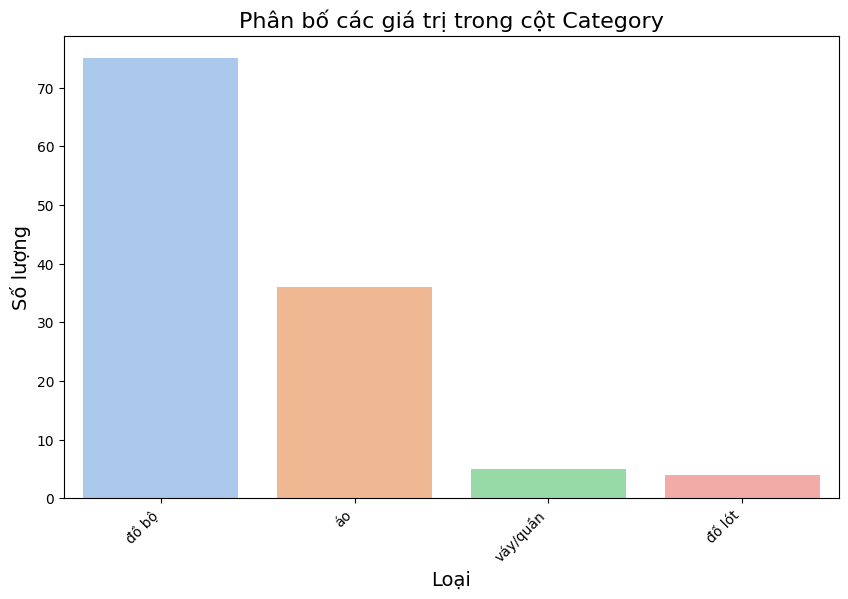

In [426]:
plt.figure(figsize = (10, 6))
sns.barplot(x = Tiki_category_counts.index, y = Tiki_category_counts.values, palette = 'pastel')
plt.title('Phân bố các giá trị trong cột Category', fontsize = 16)
plt.xlabel('Loại', fontsize = 14)
plt.ylabel('Số lượng', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [427]:
Tiki_avgPrice_per_category = df_Tiki_product.groupby('Category')['Price'].mean().round()

In [428]:
print(Tiki_avgPrice_per_category)

Category
váy/quần    185490.0
áo          101444.0
đồ bộ       205782.0
đồ lót      319000.0
Name: Price, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\1182904304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Tiki_avgPrice_per_category.index, y = Tiki_avgPrice_per_category.values, palette = 'pastel')


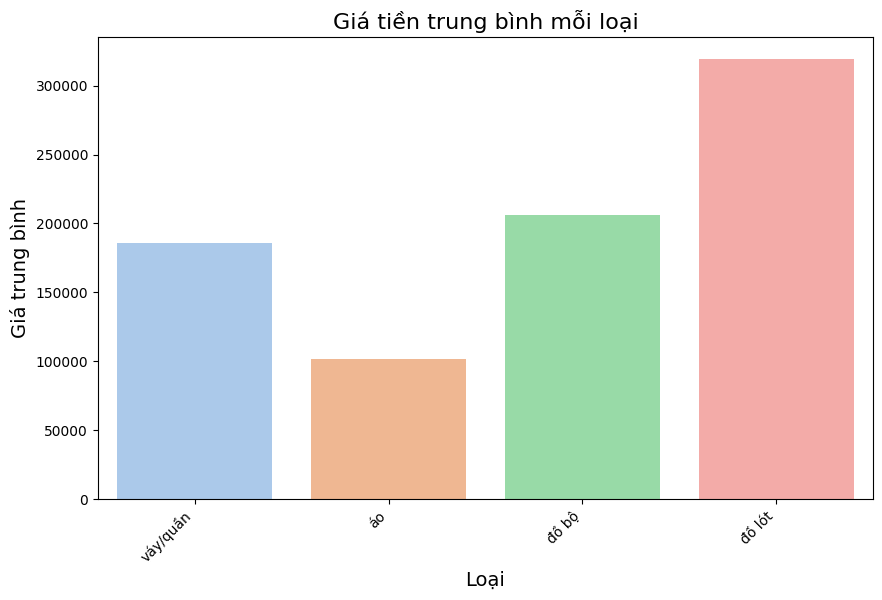

In [429]:
plt.figure(figsize = (10, 6))
sns.barplot(x = Tiki_avgPrice_per_category.index, y = Tiki_avgPrice_per_category.values, palette = 'pastel')
plt.title('Giá tiền trung bình mỗi loại', fontsize = 16)
plt.xlabel('Loại', fontsize = 14)
plt.ylabel('Giá trung bình', fontsize = 14)
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [430]:
df_Tiki_product[df_Tiki_product['Category'] == 'đồ lót'][['Name', 'Price', 'Category']]

,Name,Price,Category
24,Combo 10 Quần Lót Nữ Lưng Cao Modal Phối Ren M...,449000.0,đồ lót
39,Combo 5 quần lót nữ Modal Miley Lingerie BCS0704,189000.0,đồ lót
84,Combo 10 Quần Lót Nữ Lưng Cao Modal Phối Ren M...,449000.0,đồ lót
99,Combo 5 quần lót nữ Modal Miley Lingerie BCS0704,189000.0,đồ lót


In [431]:
df_Tiki_product[df_Tiki_product['Category'] == 'váy/quần'][['Name', 'Price', 'Category']]

,Name,Price,Category
19,COMBO ĐỒ LÍNH 3 IN 1 ÁO QUẦN KHOÁC CAO CẤP,341550.0,váy/quần
34,Jumpsuit (Áo Liền Quần) Lụa Cổ Tròn Tay Ngắn S...,199000.0,váy/quần
54,Áo Jean Liền Quần Thời Trang,195000.0,váy/quần
91,Áo Sơ Mi Nữ Form Dài Che Quần Cá Tính SM013 Ma...,128900.0,váy/quần
119,"áo thun nữ,áo phông nữ cộc tay phối màu in ...",63000.0,váy/quần


C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\847392214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price', data=df_Tiki_product, palette='Set2')


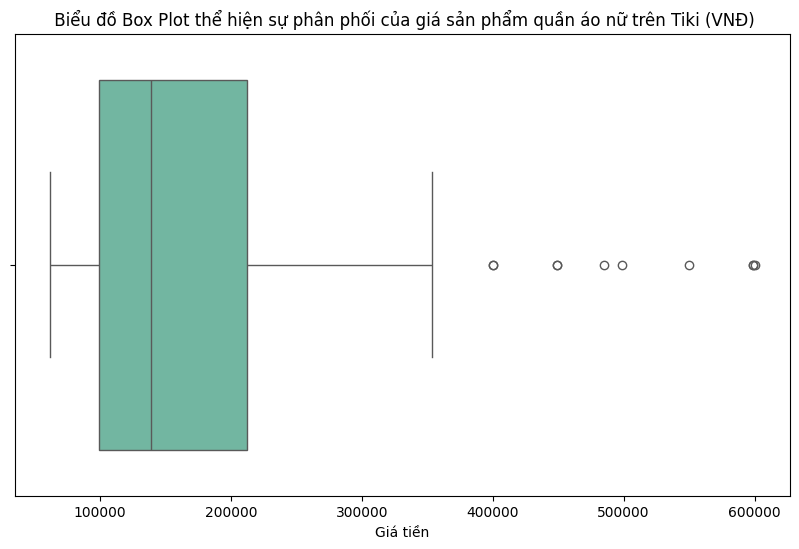

In [432]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price', data=df_Tiki_product, palette='Set2')
plt.title(' Biểu đồ Box Plot thể hiện sự phân phối của giá sản phẩm quần áo nữ trên Tiki (VNĐ)')
plt.xlabel('Giá tiền')
plt.ylabel('')
plt.show()

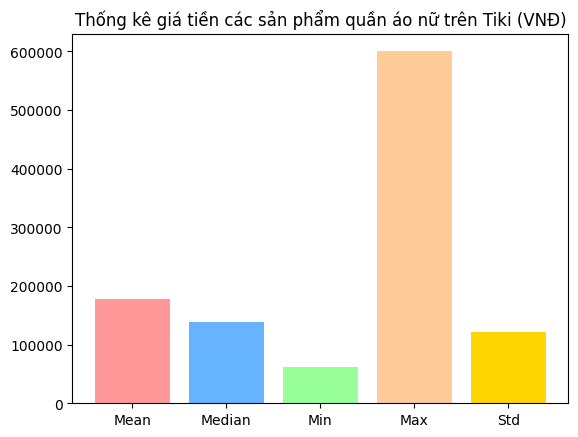

In [433]:
stats = {
    'Mean': df_Tiki_product['Price'].mean(),
    'Median': df_Tiki_product['Price'].median(),
    'Min': df_Tiki_product['Price'].min(),
    'Max': df_Tiki_product['Price'].max(),
    'Std': df_Tiki_product['Price'].std()
}

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.bar(stats.keys(), stats.values(), color = colors)
plt.title('Thống kê giá tiền các sản phẩm quần áo nữ trên Tiki (VNĐ)')
plt.show()

In [434]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

cluster_price = df_Tiki_product.copy(deep = True)

prices = cluster_price[['Price']].values
scaler = StandardScaler()
prices_scaled = scaler.fit_transform(prices)

dbscan = DBSCAN(eps = 0.5, min_samples = 20)
cluster_price['Cluster_DBSCAN'] = dbscan.fit_predict(prices_scaled)

print(cluster_price)

                                                   Url  \
0    https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...   
1    https://tka.tiki.vn/pixel/pixel?data=JBCsdBl0H...   
2    https://tka.tiki.vn/pixel/pixel?data=YFssw43Od...   
3    https://tka.tiki.vn/pixel/pixel?data=DaI5kfWdj...   
4    https://tiki.vn/set-do-bo-nu-quan-caro-phoi-ao...   
..                                                 ...   
115  https://tiki.vn/set-ao-tam-lanh-kem-quan-lenni...   
116  https://tiki.vn/set-the-thao-nu-p54006376.html...   
117  https://tiki.vn/set-quan-short-ao-phong-maybe-...   
118  https://tiki.vn/set-vay-manggo-phoi-ren-co-lot...   
119  https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...   

                                                  Name     Price  Sold  \
0    Áo thun nam cổ tim ngắn tay đẹp nhiều màu đủ s...   84000.0   366   
1    Áo thun Nữ croptop cổ tròn tay ngắn 7 màu cott...   84000.0    32   
2    Áo Thun Nam Ngắn Tay 5S FASHION, Chất Cotton M...  139000.0    33   
3    Xá

In [435]:
cluster_price[cluster_price['Cluster_DBSCAN'] == 0][['Price', 'Cluster_DBSCAN']].describe()

,Price,Cluster_DBSCAN
count,107.000000,107.0
mean,142183.046729,0.0
std,63545.216673,0.0
min,62000.000000,0.0
25%,93500.000000,0.0
50%,135000.000000,0.0
75%,175000.000000,0.0
max,310000.000000,0.0


In [436]:
cluster_price[cluster_price['Cluster_DBSCAN'] != 0][['Price', 'Cluster_DBSCAN']].describe()

,Price,Cluster_DBSCAN
count,13.000000,13.0
mean,467350.000000,-1.0
std,96865.073685,0.0
min,341550.000000,-1.0
25%,400000.000000,-1.0
50%,449000.000000,-1.0
75%,550000.000000,-1.0
max,600000.000000,-1.0


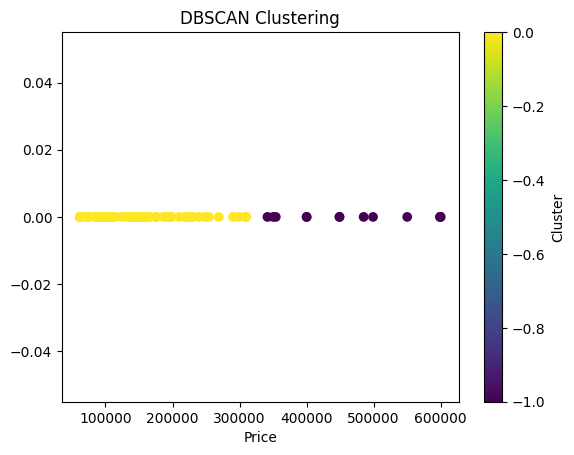

In [437]:
plt.scatter(cluster_price['Price'], np.zeros_like(cluster_price['Price']),
            c=cluster_price['Cluster_DBSCAN'], cmap='viridis', marker='o')
plt.xlabel('Price')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21036\429469881.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Phân khúc', y='Số lượng sản phẩm', data=count_by_segment, palette='pastel')


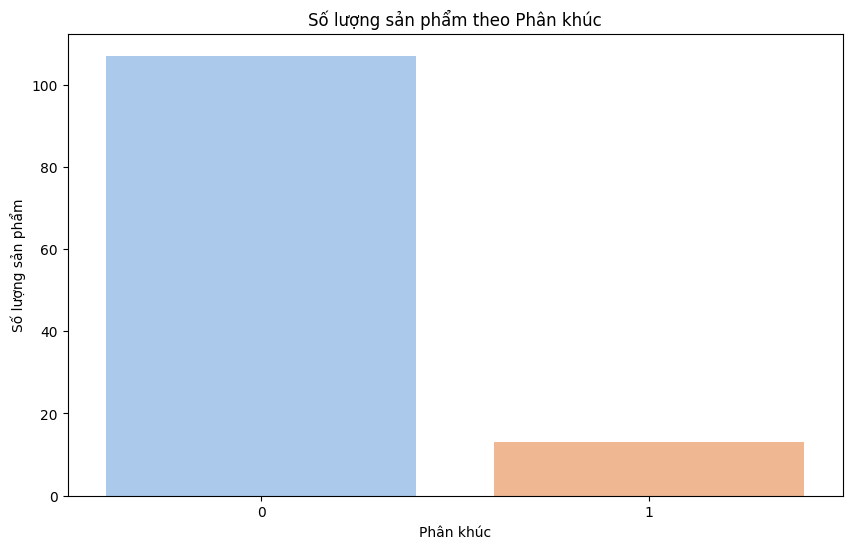

In [438]:
df_Tiki_product_pk = df_Tiki_product.copy(deep = True)
df_Tiki_product_pk['Phân khúc'] = df_Tiki_product_pk['Price'].apply(lambda x: 1 if x > 310000 else 0)

count_by_segment = df_Tiki_product_pk['Phân khúc'].value_counts().reset_index()
count_by_segment.columns = ['Phân khúc', 'Số lượng sản phẩm']

plt.figure(figsize=(10, 6))
sns.barplot(x='Phân khúc', y='Số lượng sản phẩm', data=count_by_segment, palette='pastel')
plt.title('Số lượng sản phẩm theo Phân khúc')
plt.xlabel('Phân khúc')
plt.ylabel('Số lượng sản phẩm')
plt.show()

In [439]:
df_Tiki_product_pk[df_Tiki_product_pk['Phân khúc'] == 0].describe()

,Price,Sold,Phân khúc
count,107.000000,107.000000,107.0
mean,142183.046729,25.373832,0.0
std,63545.216673,55.672141,0.0
min,62000.000000,0.000000,0.0
25%,93500.000000,1.000000,0.0
50%,135000.000000,7.000000,0.0
75%,175000.000000,32.000000,0.0
max,310000.000000,366.000000,0.0


In [440]:
df_Tiki_product_pk[df_Tiki_product_pk['Phân khúc'] == 1].describe()

,Price,Sold,Phân khúc
count,13.000000,13.000000,13.0
mean,467350.000000,9.153846,1.0
std,96865.073685,9.796650,0.0
min,341550.000000,0.000000,1.0
25%,400000.000000,1.000000,1.0
50%,449000.000000,6.000000,1.0
75%,550000.000000,19.000000,1.0
max,600000.000000,27.000000,1.0


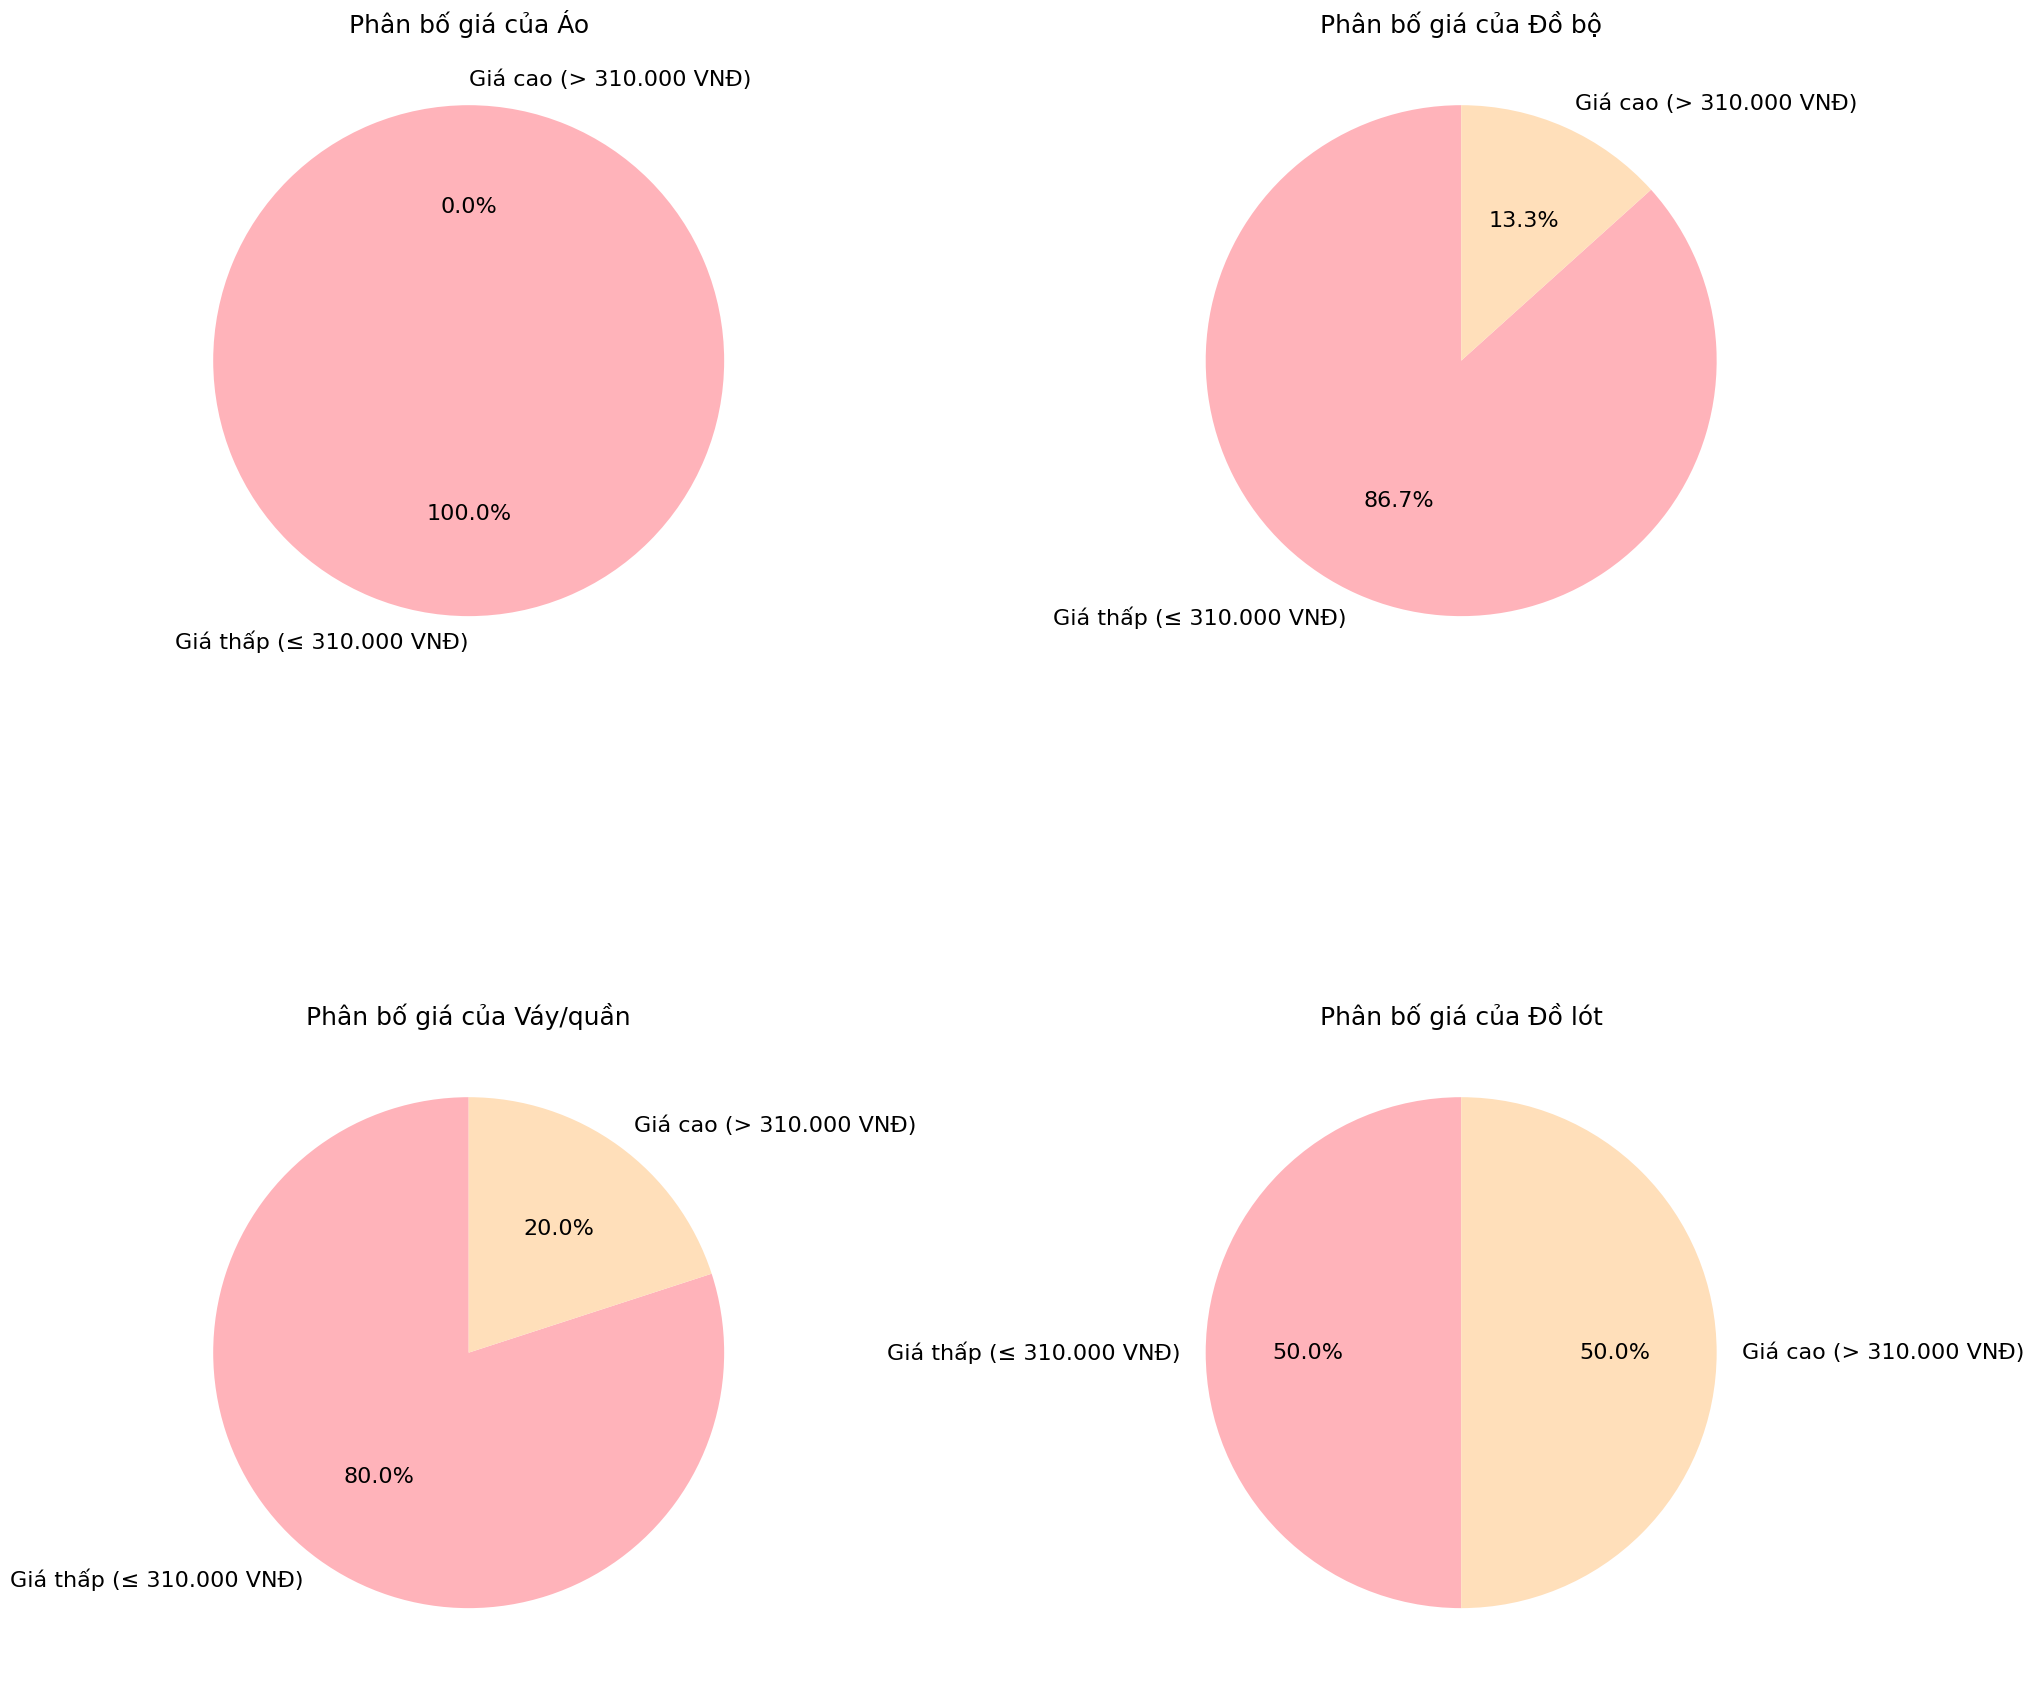

In [441]:
categories = df_Tiki_product['Category'].unique()

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
colors = ['#ffb3ba', '#ffdfba']
for i, category in enumerate(categories):
    # Lọc các sản phẩm theo loại Category
    category_data = df_Tiki_product[df_Tiki_product['Category'] == category]

    low_price_count = (category_data['Price'] <= 310000).sum()
    high_price_count = (category_data['Price'] > 310000).sum()

    sizes = [low_price_count, high_price_count]
    labels = ['Giá thấp (≤ 310.000 VNĐ)', 'Giá cao (> 310.000 VNĐ)']

    ax = axs[i//2, i%2]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 16})
    ax.set_title(f'Phân bố giá của {category.capitalize()}', fontsize = 18)

plt.subplots_adjust(hspace=0, wspace=0)
plt.tight_layout()
plt.show()

In [442]:
df_Tiki_product['Sold'].sum()

2834

In [443]:
df_Tiki_product['Sold'].describe()

count    120.000000
mean      23.616667
std       52.878199
min        0.000000
25%        1.000000
50%        7.000000
75%       27.000000
max      366.000000
Name: Sold, dtype: float64

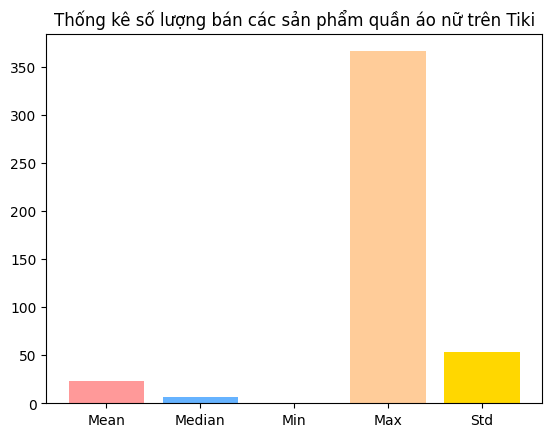

In [444]:
stats = {
    'Mean': df_Tiki_product['Sold'].mean(),
    'Median': df_Tiki_product['Sold'].median(),
    'Min': df_Tiki_product['Sold'].min(),
    'Max': df_Tiki_product['Sold'].max(),
    'Std': df_Tiki_product['Sold'].std()
}

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']
plt.bar(stats.keys(), stats.values(), color = colors)
plt.title('Thống kê số lượng bán các sản phẩm quần áo nữ trên Tiki')
plt.show()

In [445]:
len(df_Tiki_product[df_Tiki_product['Sold'] == 0])

27

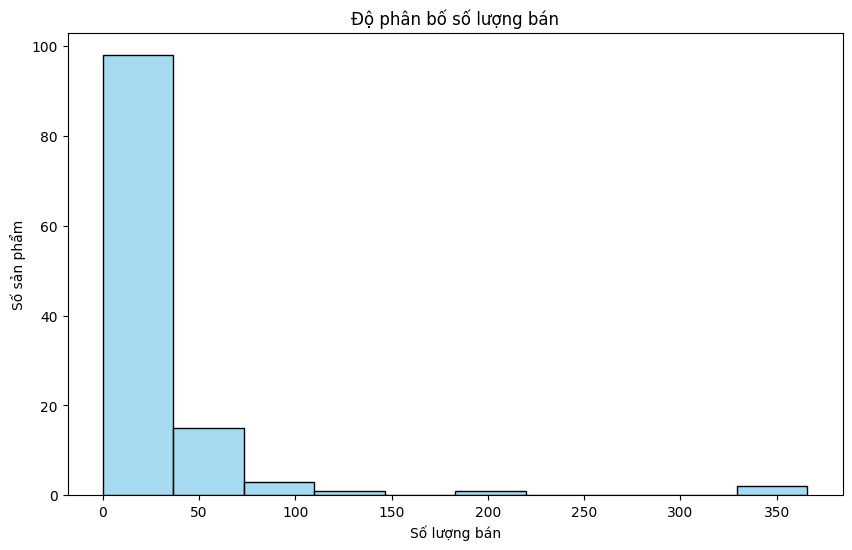

In [446]:
plt.figure(figsize=(10, 6))
sns.histplot(df_Tiki_product['Sold'], bins=10, kde=False, color='skyblue')
plt.title('Độ phân bố số lượng bán')
plt.xlabel('Số lượng bán')
plt.ylabel('Số sản phẩm')
plt.show()

In [447]:
df_Tiki_product[df_Tiki_product['Sold'] > 150]

,Url,Name,Price,Sold,Category
0,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,Áo thun nam cổ tim ngắn tay đẹp nhiều màu đủ s...,84000.0,366,áo
14,https://tka.tiki.vn/pixel/pixel?data=OKDTQcQMR...,"Xách ba lô lên và đi, mã TV4. Áo thun du lịch ...",161000.0,202,áo
60,https://tka.tiki.vn/pixel/pixel?data=TDKSEF565...,Áo thun nam cổ tim ngắn tay đẹp nhiều màu đủ s...,84000.0,366,áo


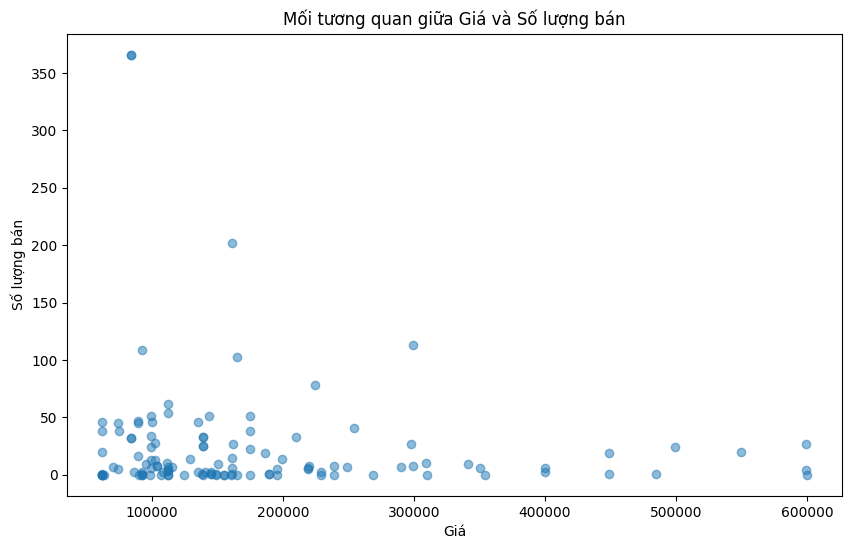

In [448]:
plt.figure(figsize=(10, 6))
plt.scatter(df_Tiki_product['Price'], df_Tiki_product['Sold'], alpha=0.5)
plt.title('Mối tương quan giữa Giá và Số lượng bán')
plt.xlabel('Giá')
plt.ylabel('Số lượng bán')
plt.show()

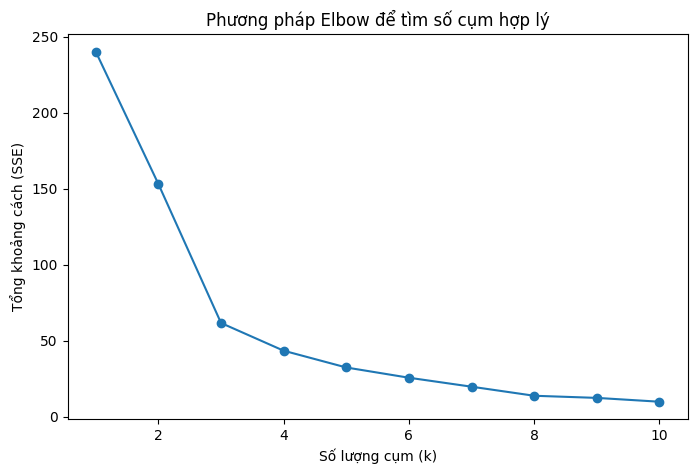

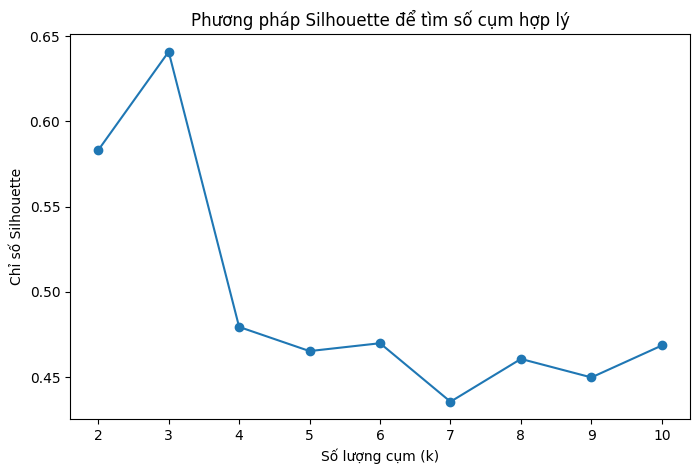

In [449]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

df_Tiki_product_kmeans = df_Tiki_product[['Price', 'Sold']].copy(deep = True)
X = df_Tiki_product_kmeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Tổng khoảng cách (SSE)')
plt.title('Phương pháp Elbow để tìm số cụm hợp lý')
plt.show()

# Phương pháp Silhouette
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Vẽ biểu đồ Silhouette
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Số lượng cụm (k)')
plt.ylabel('Chỉ số Silhouette')
plt.title('Phương pháp Silhouette để tìm số cụm hợp lý')
plt.show()

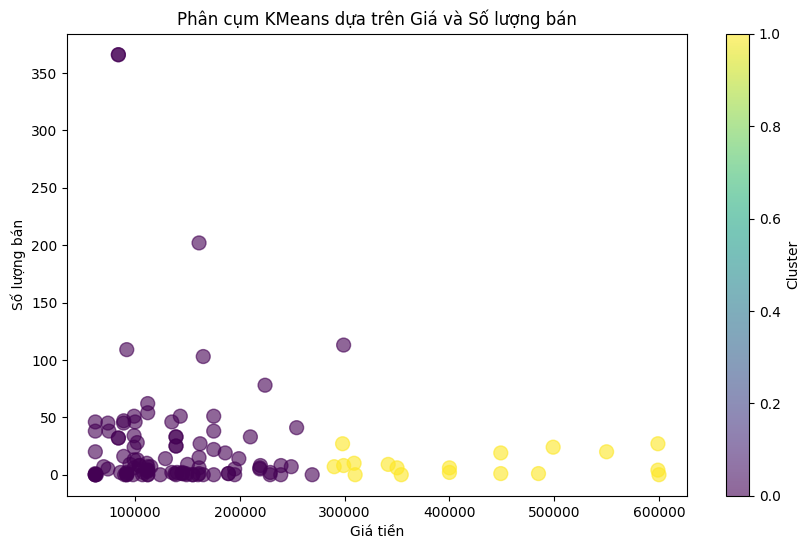

In [450]:
from sklearn.cluster import KMeans

df_Tiki_product_kmeans = df_Tiki_product[['Price', 'Sold']].copy(deep = True)
X = df_Tiki_product_kmeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
df_Tiki_product_kmeans['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_Tiki_product_kmeans['Price'], df_Tiki_product_kmeans['Sold'], c=df_Tiki_product_kmeans['Cluster'], cmap='viridis', alpha=0.6, s=100)
plt.title('Phân cụm KMeans dựa trên Giá và Số lượng bán')
plt.xlabel('Giá tiền')
plt.ylabel('Số lượng bán')
plt.colorbar(label='Cluster')
plt.show()

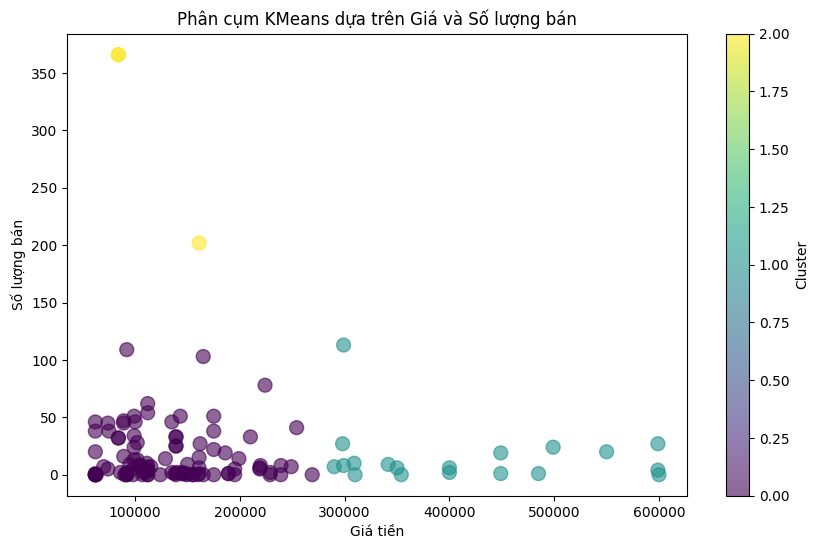

In [451]:
from sklearn.cluster import KMeans

df_Tiki_product_kmeans = df_Tiki_product[['Price', 'Sold']].copy(deep = True)
X = df_Tiki_product_kmeans
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_Tiki_product_kmeans['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(df_Tiki_product_kmeans['Price'], df_Tiki_product_kmeans['Sold'], c=df_Tiki_product_kmeans['Cluster'], cmap='viridis', alpha=0.6, s=100)
plt.title('Phân cụm KMeans dựa trên Giá và Số lượng bán')
plt.xlabel('Giá tiền')
plt.ylabel('Số lượng bán')
plt.colorbar(label='Cluster')
plt.show()

In [452]:
df_Tiki_product_kmeans[df_Tiki_product_kmeans['Cluster'] == 0].describe()

,Price,Sold,Cluster
count,98.000000,98.000000,98.0
mean,133465.153061,16.489796,0.0
std,51986.520727,22.326188,0.0
min,62000.000000,0.000000,0.0
25%,92750.000000,1.000000,0.0
50%,119500.000000,6.500000,0.0
75%,161750.000000,27.750000,0.0
max,269000.000000,109.000000,0.0


In [453]:
df_Tiki_product_kmeans[df_Tiki_product_kmeans['Cluster'] == 1].describe()

,Price,Sold,Cluster
count,19.000000,19.000000,19.0
mean,414765.842105,14.947368,1.0
std,112226.608731,25.502666,0.0
min,290001.000000,0.000000,1.0
25%,309500.000000,1.500000,1.0
50%,400000.000000,7.000000,1.0
75%,492000.000000,19.500000,1.0
max,600000.000000,113.000000,1.0


In [454]:
df_Tiki_product_kmeans[df_Tiki_product_kmeans['Cluster'] == 2]

,Price,Sold,Cluster
0,84000.0,366,2
14,161000.0,202,2
60,84000.0,366,2


In [455]:
df_Tiki_product['Product_Object'] = df_Tiki_product_kmeans['Cluster']

In [456]:
df_Tiki_product['Product_Object'] = df_Tiki_product['Product_Object'].apply(lambda x: 1 if x == 0 else 2 if x == 1 else 3 if x == 2 else x)

### df_Tiki_feedback

In [457]:
df_Tiki_feedback.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 0 to 815
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product_Url  399 non-null    object
 1   Content      399 non-null    object
dtypes: object(2)
memory usage: 9.4+ KB


In [458]:
set(list(df_Tiki_feedback['Product_Url']))

{'https://tiki.vn/ao-jean-lien-quan-thoi-trang-p58373669.html?spid=58902869',
 'https://tiki.vn/ao-so-mi-nu-form-dai-che-quan-ca-tinh-sm013-mayhomes-p37975688.html?spid=37975696',
 'https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-tay-phoi-mau-in-so-11-dang-rong-giau-quan-nang-dong-p115832954.html?spid=115832960',
 'https://tiki.vn/bo-do-nu-mac-nha-di-choi-nguyen-set-ao-va-quan-thun-cotton-thai-co-dan-thoai-mai-what-cll-p168273197.html?spid=193891646',
 'https://tiki.vn/bo-do-the-thao-nu-phoi-mau-tt379-p56244246.html?spid=56659146',
 'https://tiki.vn/bo-do-the-thao-nu-phoi-soc-tt132-p54427832.html?spid=57286069',
 'https://tiki.vn/bo-quan-ao-thun-meyrr-coc-tay-set-ao-phong-quan-dui-dang-rong-2-mau-p181118329.html?spid=189957451',
 'https://tiki.vn/bo-quan-ao-xep-ly-p14837823.html?spid=14837827',
 'https://tiki.vn/combo-do-linh-3-in-1-ao-quan-khoac-cao-cap-p35245088.html?spid=56688291',
 'https://tiki.vn/do-bo-cototn-nu-hoa-tiet-theu-quan-dai-sieu-re-dep-p67594700.html?spid=73864611',
 'http

In [459]:
len(set(list(df_Tiki_feedback['Product_Url'])))

77

In [460]:
feedbacks = df_Tiki_feedback['Content']

In [461]:
import re
def text_preprocess(text):
    text = text.lower()
    text = re.sub(r'([:,./?:#()])', r' ', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text.split()

In [462]:
feedbacks = [text_preprocess(fb) for fb in feedbacks]

Run this cell if the computer hasn't installed the gensim library yet

In [463]:
# !pip install gensim

In [464]:
from gensim.models import Word2Vec
model = Word2Vec(feedbacks, vector_size=100, window=10, min_count=1, workers=4)

In [465]:
similar_words = model.wv.most_similar('tốt', topn=20)
print(similar_words)

[('là', 0.944576621055603), ('áo', 0.9439631700515747), ('và', 0.9433819651603699), ('shop', 0.942969560623169), ('không', 0.939017117023468), ('hàng', 0.9374523162841797), ('sao', 0.9373964071273804), ('đúng', 0.9362362027168274), ('mua', 0.9359807372093201), ('mà', 0.9350067377090454), ('rất', 0.9343278408050537), ('in', 0.9331153631210327), ('có', 0.9330013990402222), ('giặt', 0.9329318404197693), ('mình', 0.9325892329216003), ('ở', 0.9324418902397156), ('màu', 0.9319700002670288), ('mát', 0.93140709400177), ('các', 0.9305574297904968), ('nói', 0.9305208325386047)]


In [466]:
similar_words = model.wv.most_similar('đẹp', topn=20)
print(similar_words)

[('shop', 0.9763383269309998), ('mặc', 0.9755246043205261), ('màu', 0.9750699996948242), ('áo', 0.9738761782646179), ('và', 0.9730252027511597), ('người', 0.9729058146476746), ('rất', 0.972639799118042), ('mua', 0.9726108908653259), ('ở', 0.9722045660018921), ('là', 0.971940279006958), ('không', 0.9719372987747192), ('hàng', 0.9706196784973145), ('hình', 0.9703096747398376), ('hơn', 0.9689006805419922), ('cũng', 0.9688057899475098), ('nhưng', 0.9684683680534363), ('thì', 0.9682518839836121), ('sẽ', 0.9673078060150146), ('lần', 0.9672976136207581), ('hộ', 0.9664720892906189)]


In [467]:
similar_words = model.wv.most_similar('tệ', topn=10)
print(similar_words)

[('in', 0.8836260437965393), ('mềm', 0.8782536387443542), ('cho', 0.8768638968467712), ('mua', 0.8750389814376831), ('là', 0.8743321299552917), ('mặc', 0.8713264465332031), ('hình', 0.8706809878349304), ('không', 0.8695112466812134), ('vải', 0.8691315650939941), ('lần', 0.8691217303276062)]


In [468]:
similar_words = model.wv.most_similar('xấu', topn=10)
print(similar_words)

[('với', 0.8109920620918274), ('vì', 0.810969889163971), ('biết', 0.8079793453216553), ('và', 0.8041371703147888), ('ở', 0.8027129173278809), ('giờ', 0.8018089532852173), ('mát', 0.8009229898452759), ('chắc', 0.8004041314125061), ('100', 0.7999653220176697), ('có', 0.7994275689125061)]


In [469]:
similar_words = model.wv.most_similar('ổn', topn=5)
print(similar_words)

[('sự', 0.9271922707557678), ('giặt', 0.9225294589996338), ('áo', 0.9206447005271912), ('vải', 0.9179604649543762), ('màu', 0.917701005935669)]


In [470]:
from nltk import ngrams

positive_words = ['tuyệt vời', 'hài lòng', 'thích', 'đẹp', 'mát', 'xinh', 'mát', 'dày dặn', 'ưng ý', 'lý tưởng', 'hấp dẫn', 'hoàn hảo', 'thoải mái', 'mê', 'tốt', 'ưng', 'bền', 'vừa ý', 'dễ thương', 'cute', 'đáng mua', 'nên mua']
negative_words = ['không hài lòng', 'thất vọng', 'kém', 'xấu', 'tệ', 'gớm', 'chán', 'nóng', 'lỗi', 'khó chịu', 'kì', 'cứng', 'thấy ghê', 'hơi', 'mắc', 'đắt', 'không đúng', 'ko đúng', 'vớ vẩn', 'ni lông', 'nilon', 'không thích', 'ko thích', 'ko ưng', 'phải chi', 'thô']

def calculate_satisfaction_score(review):
    score = 0
    for word in review:
        if word in positive_words:
            score += 1 
        elif word in negative_words:
            score -= 1 

    bigrams = ngrams(review, 2)
    for bigram in bigrams:
        bigram_str = ' '.join(bigram)
        if bigram_str in positive_words:
            score += 1 
        elif bigram_str in negative_words:
            score -= 1 

    return score

satisfaction_scores = [calculate_satisfaction_score(fb) for fb in feedbacks]
df_Tiki_feedback['SentScore'] = satisfaction_scores

In [471]:
df_Tiki_feedback[['Content', 'SentScore']]

,Content,SentScore
0,10 điểm,0
9,đẹp,1
12,Sản phẩm chất lượng tốt. Mình rất ưng ý,3
13,"Áo đẹp, chất lượng tốt, nhân viên giao hàng nh...",2
14,"sản phẩm rất đẹp, thun mát lạnh, hợp túi tiền ...",2
...,...,...
807,đóng gói chắc chắn. quá ok so với giá.,0
809,tốt,1
810,Áo chất vải hơi mỏng …….z,-1
811,dẹp,0


In [472]:
def get_review_vector(review):
    words = review
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

In [473]:
def classify_score(score):
    if score < 0:
        return 0
    elif score == 0:
        return 1
    else:
        return 2

In [474]:
labels = df_Tiki_feedback['SentScore'].apply(classify_score)

In [475]:
df_Tiki_feedback['Label'] = labels

In [476]:
df_Tiki_feedback['Label'].value_counts()

Label
2    231
1    127
0     41
Name: count, dtype: int64

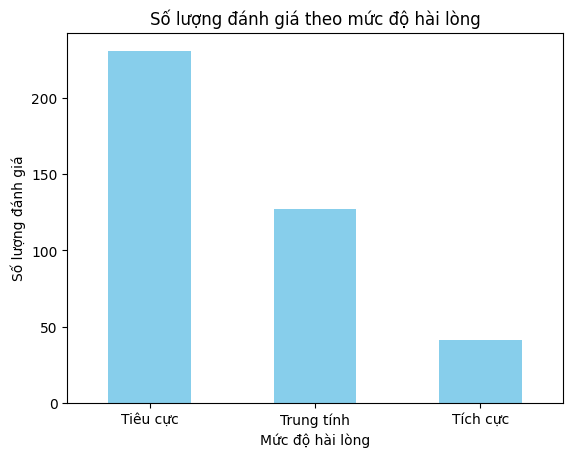

In [477]:
df_Tiki_feedback['Label'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Số lượng đánh giá theo mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Số lượng đánh giá')
plt.xticks(ticks=[0, 1, 2], labels=['Tiêu cực', 'Trung tính', 'Tích cực'], rotation=0)
plt.show()

Run this cell if the computer hasn't installed the wordcloud library yet

In [478]:
# !pip install wordcloud

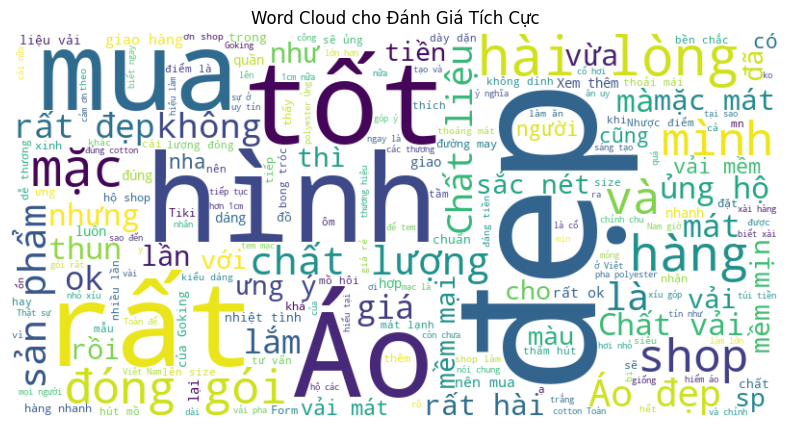

In [479]:
from wordcloud import WordCloud

positive_comments = ' '.join(df_Tiki_feedback[df_Tiki_feedback['Label'] == 2]['Content'])
neutral_comments = ' '.join(df_Tiki_feedback[df_Tiki_feedback['Label'] == 1]['Content'])
negative_comments = ' '.join(df_Tiki_feedback[df_Tiki_feedback['Label'] == 0]['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho Đánh Giá Tích Cực')
plt.show()

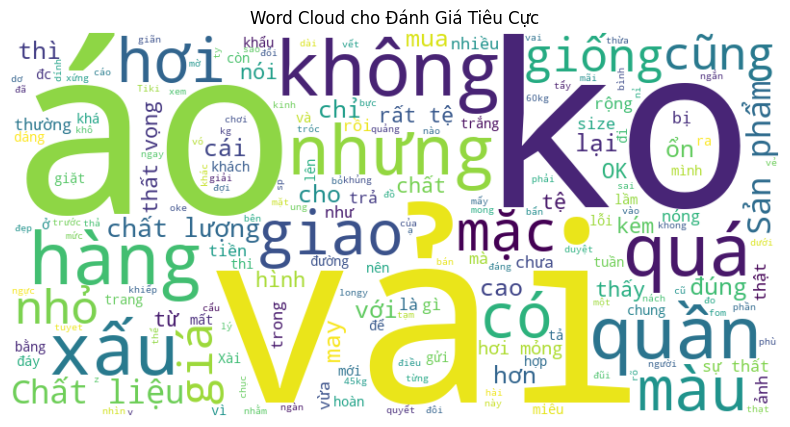

In [480]:
from wordcloud import WordCloud

positive_comments = ' '.join(df_Tiki_feedback[df_Tiki_feedback['Label'] == 2]['Content'])
neutral_comments = ' '.join(df_Tiki_feedback[df_Tiki_feedback['Label'] == 1]['Content'])
negative_comments = ' '.join(df_Tiki_feedback[df_Tiki_feedback['Label'] == 0]['Content'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_comments)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud cho Đánh Giá Tiêu Cực')
plt.show()

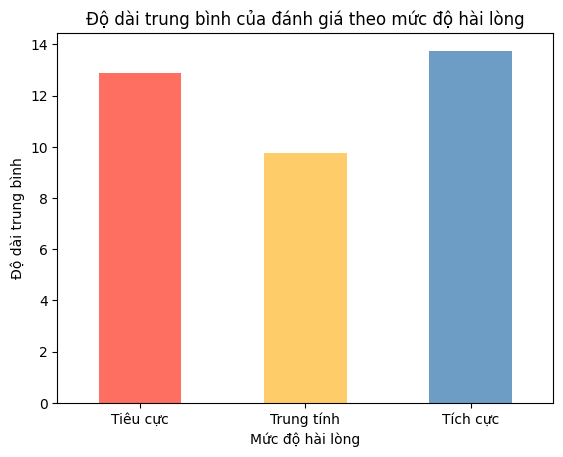

In [481]:
df_Tiki_feedback['Length'] = df_Tiki_feedback['Content'].str.split().str.len()
mean_length = df_Tiki_feedback.groupby('Label')['Length'].mean()

colors = ['#FF6F61', '#FFCC6A', '#6D9DC5']
mean_length.plot(kind='bar', color=colors)

plt.title('Độ dài trung bình của đánh giá theo mức độ hài lòng')
plt.xlabel('Mức độ hài lòng')
plt.ylabel('Độ dài trung bình')
plt.xticks(ticks=[0, 1, 2], labels=['Tiêu cực', 'Trung tính', 'Tích cực'], rotation=0)
plt.show()

In [482]:
df_Tiki_feedback['Length'].mean()

12.395989974937343

In [483]:
mean_length

Label
0    12.878049
1     9.771654
2    13.753247
Name: Length, dtype: float64

In [484]:
df_merged = pd.merge(df_Tiki_feedback, df_Tiki_product, left_on='Product_Url', right_on='Url')

In [485]:
df_merged['Category'].value_counts()

Category
áo          182
đồ bộ       158
váy/quần     49
đồ lót       10
Name: count, dtype: int64

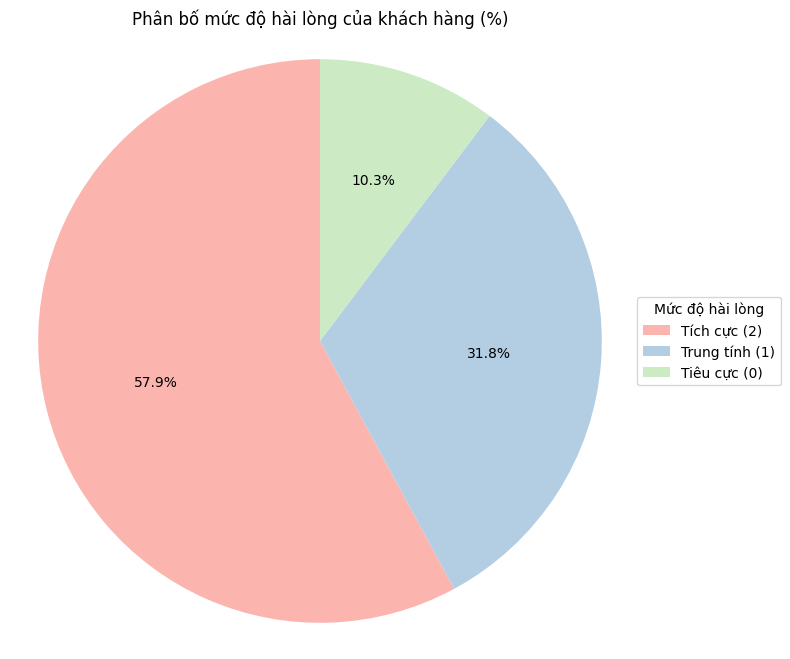

In [494]:
label_counts = df_merged['Label'].value_counts()

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(label_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)

labels = ['Tích cực (2)', 'Trung tính (1)', 'Tiêu cực (0)']
plt.legend(wedges, labels, title="Mức độ hài lòng", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Phân bố mức độ hài lòng của khách hàng (%)')
plt.axis('equal')
plt.show()

In [500]:
df_merged['Label'].value_counts()

Label
2    231
1    127
0     41
Name: count, dtype: int64

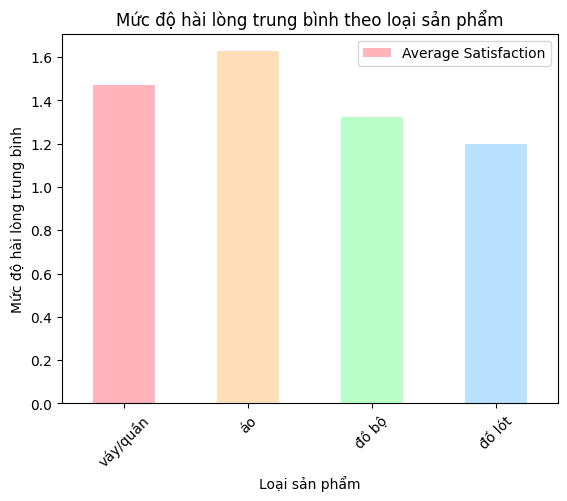

In [503]:
category_feedback = df_merged.groupby('Category')['Label'].mean().reset_index()
category_feedback.columns = ['Category', 'Average Satisfaction']

pastel_colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9', '#BAE1FF', '#FFC3A0', '#FF677D']
category_feedback.plot(kind='bar', x='Category', y='Average Satisfaction', color=pastel_colors[:len(category_feedback)])
plt.title('Mức độ hài lòng trung bình theo loại sản phẩm')
plt.xlabel('Loại sản phẩm')
plt.ylabel('Mức độ hài lòng trung bình')
plt.xticks(rotation=45)
plt.show()

In [504]:
df_merged.groupby('Category')['Label'].mean()

Category
váy/quần    1.469388
áo          1.626374
đồ bộ       1.322785
đồ lót      1.200000
Name: Label, dtype: float64

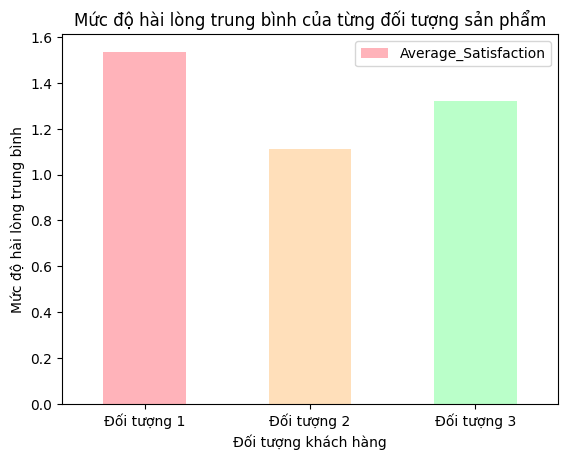

In [497]:
product_satisfaction = df_merged.groupby('Product_Object')['Label'].mean().reset_index()
product_satisfaction.columns = ['Product_Object', 'Average_Satisfaction']

pastel_colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9', '#BAE1FF', '#FF677D', '#FFC3A0']
product_satisfaction.plot(kind='bar', x='Product_Object', y='Average_Satisfaction', color=pastel_colors[:len(product_satisfaction)])
plt.title('Mức độ hài lòng trung bình của từng đối tượng sản phẩm')
plt.xlabel('Đối tượng khách hàng')
plt.ylabel('Mức độ hài lòng trung bình')
plt.xticks(ticks=[0, 1, 2], labels=['Đối tượng 1', 'Đối tượng 2', 'Đối tượng 3'], rotation=0)
plt.show()

In [498]:
df_merged['Label'].mean()

1.4761904761904763

In [491]:
product_satisfaction

,Product_Object,Average_Satisfaction
0,1,1.536741
1,2,1.111111
2,3,1.322034


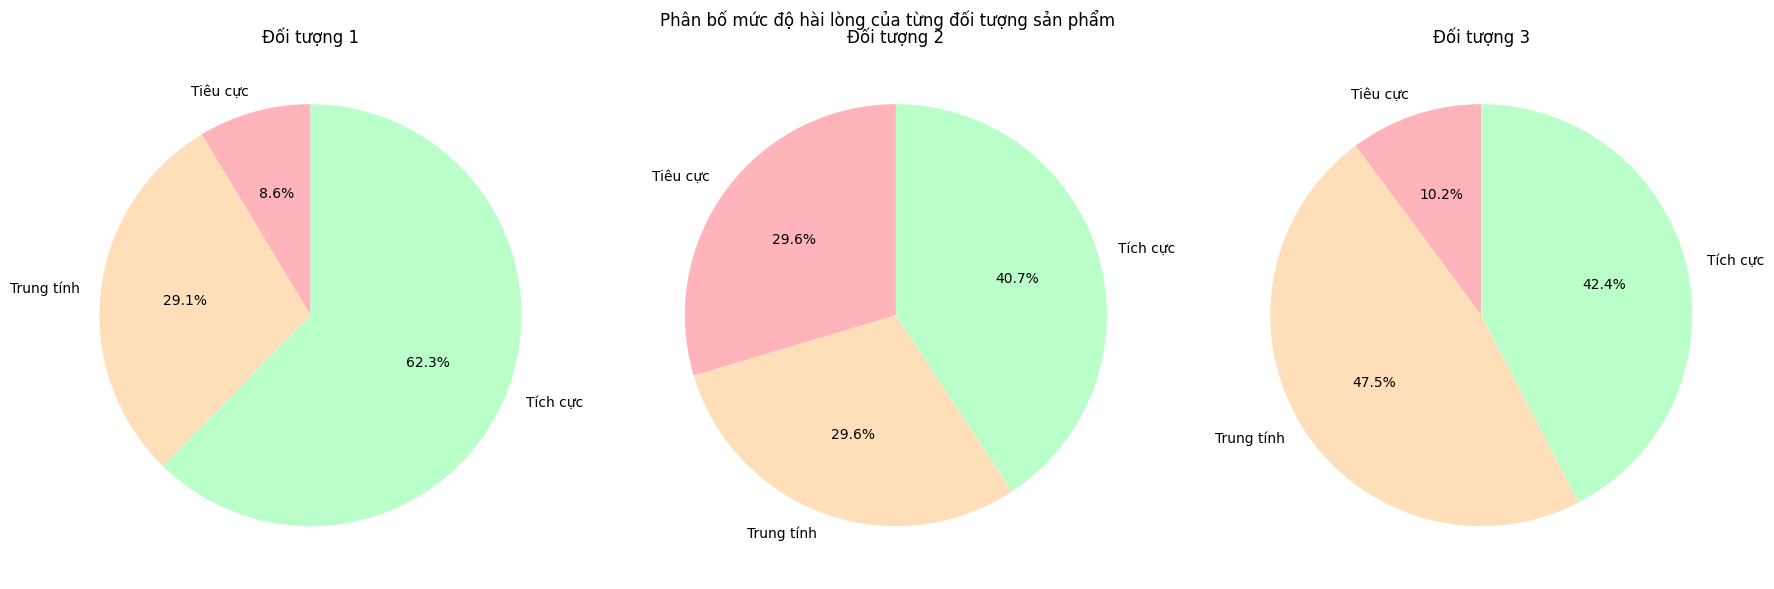

In [492]:
label_distribution = df_merged.groupby(['Product_Object', 'Label']).size().unstack().fillna(0)

labels = ['Tiêu cực', 'Trung tính', 'Tích cực']
colors = ['#FFB3BA', '#FFDFBA', '#BAFFC9']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, Product_Object in enumerate(label_distribution.index):
    axes[i].pie(label_distribution.loc[Product_Object], 
                labels=labels, 
                autopct='%1.1f%%', 
                startangle=90, 
                colors=colors)
    axes[i].set_title(f'Đối tượng {Product_Object}')

plt.suptitle('Phân bố mức độ hài lòng của từng đối tượng sản phẩm')
plt.tight_layout()
plt.show()

In [507]:
label_distribution

Label,0,1,2
Product_Object,,,
1,27,91,195
2,8,8,11
3,6,28,25


In [511]:
len(df_merged[df_merged['Product_Object'] == 1])

313

In [512]:
len(df_merged[df_merged['Product_Object'] == 2])

27

In [513]:
len(df_merged[df_merged['Product_Object'] == 3])

59

In [493]:
df_Tiki_feedback

,Product_Url,Content,SentScore,Label,Length
0,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,10 điểm,0,1,2
9,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,đẹp,1,2,1
12,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,Sản phẩm chất lượng tốt. Mình rất ưng ý,3,2,9
13,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,"Áo đẹp, chất lượng tốt, nhân viên giao hàng nh...",2,2,11
14,https://tka.tiki.vn/pixel/pixel?data=T2lnUguZN...,"sản phẩm rất đẹp, thun mát lạnh, hợp túi tiền ...",2,2,13
...,...,...,...,...,...
807,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,đóng gói chắc chắn. quá ok so với giá.,0,1,9
809,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,tốt,1,2,1
810,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,Áo chất vải hơi mỏng …….z,-1,0,6
811,https://tiki.vn/ao-thun-nu-a-o-phong-nu-coc-ta...,dẹp,0,1,1


# Analysis comprehensive overview based on the whole 2 datasets